#**Main Project: English Premier League Prediction**

_The English Premier League is the most competitive, televised, and widely watched football
tournament. The factors affecting a football match can be combined with Machine Learning to
predict the outcome of a match. This paper demonstrates our work on building a generalized
model for predicting the results of the English Premier League. It a type of classification
problem, where the model will be going to predict whether a team wins, lose or draws a match.
Using feature engineering and exploratory data analysis, we will be creating a feature set for
determining the most important factors for predicting the results of a football match, and
consequently creating a highly accurate predictive system using machine learning._

_The following are the necessary tasks that needs to be performed_


*   Understanding the Data
*   Exploratory Data Analysis
*   Data Pre-processing
    * Missing Values
    * Outlier Detection
    * Feature Encoding
    * Feature Reduction
    * Standardization
    * Feature Engineering
*   Predictive Modeling 
    * Logistic Regression Model
    * Decision Tree Model
    * Random Forest Model
    * Gaussian Naive Bayes Model
    * Multinomial Naive Bayes Model
    * Bernoulli Naive Bayes Model
    * K-Nearest Neighbours Model
    * Support Vector Machine Model
*   Fine Tuning





##**1. Understanding the Data**

######***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

######***Reading the dataset into the Python Environment***

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Main-Project/results.csv', encoding='windows-1252')
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Insights:**###
Feature  | Description 
------------------------------------------|-------------------|
Season | Match Season |
DateTime | Match Date and Time (yyyy-mm-dd hh:mm:ss) |
HomeTeam | Home Team |
AwayTeam | Away Team |
FTHG | Full Time Home Team Goals |
FTAG | Full Time Away Team Goals |
FTR | Full Time Result (H=Home Win, D=Draw, A=Away Win) |
HTHG | Half Time Home Team Goals |
HTAG | Half Time Away Team Goals |
HTR | Half Time Result (H=Home Win, D=Draw, A=Away Win) |
Referee | Match Referee |
HS | Home Team Shots |
AS | Away Team Shots |
HST | Home Team Shots on Target |
AST | Away Team Shots on Target |
HC | Home Team Corners |
AC | Away Team Corners |
HF | Home Team Fouls Committed |
AF | Away Team Fouls Committed |
HY | Home Team Yellow Cards |
AY | Away Team Yellow Cards |
HR | Home Team Red Cards |
AR | Away Team Red Cards |


######***Datatypes & Columns having Null Values***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10874 entries, 0 to 10873
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10874 non-null  object 
 1   DateTime  10874 non-null  object 
 2   HomeTeam  10874 non-null  object 
 3   AwayTeam  10874 non-null  object 
 4   FTHG      10874 non-null  int64  
 5   FTAG      10874 non-null  int64  
 6   FTR       10874 non-null  object 
 7   HTHG      9950 non-null   float64
 8   HTAG      9950 non-null   float64
 9   HTR       9950 non-null   object 
 10  Referee   8050 non-null   object 
 11  HS        8050 non-null   float64
 12  AS        8050 non-null   float64
 13  HST       8050 non-null   float64
 14  AST       8050 non-null   float64
 15  HC        8050 non-null   float64
 16  AC        8050 non-null   float64
 17  HF        8050 non-null   float64
 18  AF        8050 non-null   float64
 19  HY        8050 non-null   float64
 20  AY        8050 non-null   fl

###**Insights:**###

*   The dataset contains information about ***10874*** Premier League matches.
*   Among the 23 features, ***16*** (HTHG, HTAG, HTR, Referee, HS, AS, HST, AST, HC, AC, HF, AF, HY, AY, HR, AR) of them have ***Null values***
* Most of the features are of Float datatype


######***Basic details of the data***

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Season,10874,29,1993-94,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateTime,10874,3290,1994-01-01T00:00:00Z,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomeTeam,10874,50,Tottenham,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AwayTeam,10874,50,Arsenal,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTHG,10874.0,NaN,NaN,NaN,1.519036,1.301456,0.0,1.0,1.0,2.0,9.0
FTAG,10874.0,NaN,NaN,NaN,1.136564,1.131564,0.0,0.0,1.0,2.0,9.0
FTR,10874,3,H,4986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTHG,9950.0,NaN,NaN,NaN,0.684925,0.835635,0.0,0.0,0.0,1.0,5.0
HTAG,9950.0,NaN,NaN,NaN,0.497688,0.718315,0.0,0.0,0.0,1.0,5.0
HTR,9950,3,D,4150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.agg({'Season': ['min', 'max']})

,Season
min,1993-94
max,2021-22


In [7]:
df['HomeTeam'].nunique()

50

In [8]:
df['AwayTeam'].nunique()

50

###**Insights:**###
    

*   The dataset contains information of the ***29 Seasons*** from ***1993-94*** to ***2021-22***.
*   Contains ***50 Teams***.
*   Most number of matches happend in the season - ***1993-94***.
*   ***Tottenham*** played the most number of matches as Home Team.
*   ***Arsenal*** played the most number of matches as Away Team.
*   The most number of matches won by the Home Team.
*   On an average the home team scores more goals and takes more shots.
*   Most goals scored by one team in a match are 9.
*   At most 5 goals are scored at half time.
*   The away team commits more fouls on average.
*   Away team gets more yellow and red cards.








##**2. Exploratory Data Analysis**

######***Univariate Analysis - Full Time Result***

Text(0, 0.5, 'Count')

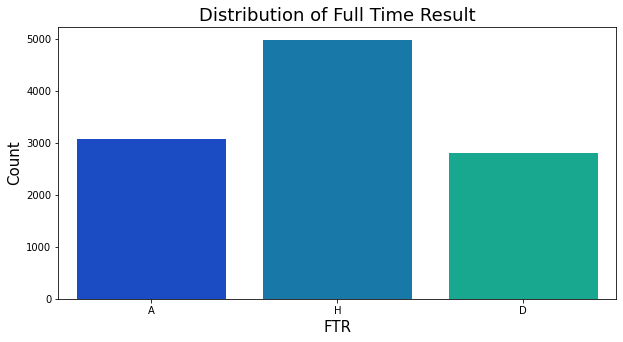

In [9]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data=df,x="FTR",palette="winter")
plt.title("Distribution of Full Time Result",size=18)
plt.xlabel("FTR",size=15)
plt.ylabel("Count",size=15)

###**Insights:**###
*   The Home team has Significantly more wins.
*   Away Team is more likely to get a Draw or a loss more often.
*   Playing at home is a big advantage.





######***Univariate Analysis - Comparison in scoring Goals***

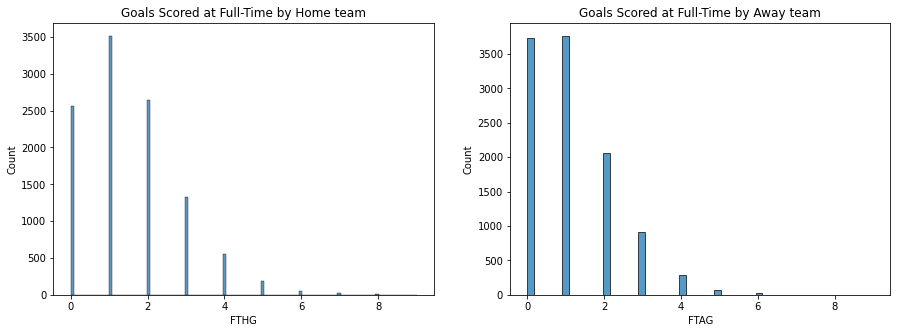

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df, x="FTHG")
plt.title("Goals Scored at Full-Time by Home team")
plt.subplot(1, 2, 2)
sns.histplot(df, x="FTAG")
plt.title("Goals Scored at Full-Time by Away team")
plt.show()

###**Insights:**###
*   Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence). Away team slightly ahead here.
*   However, When it come to more than 2 goals, Home Teams are ahead.



######***Bivariate Analysis - Effect of Half Time Result on Full Time Result***

Text(0, 0.5, 'Count')

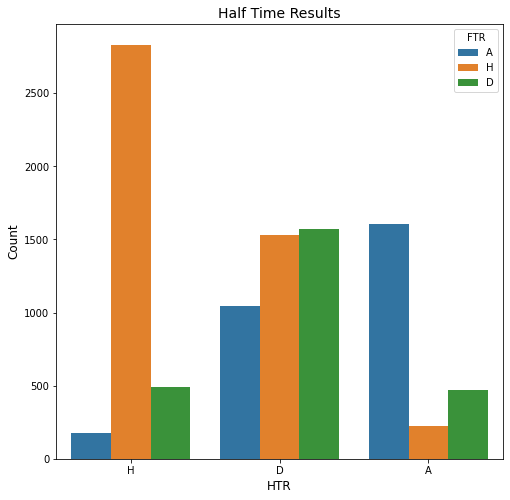

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x="HTR",hue="FTR")
plt.title('Half Time Results',size=14)
plt.xlabel("HTR",size=12)
plt.ylabel("Count",size=12)

###**Insights:**###
*   From the analysis we can understand that, the half time result will almost determine the Full time result
*   so HTR is a very important variable to determine who wins at Full time.

######***Bivariate Analysis - Season Vs Goals***

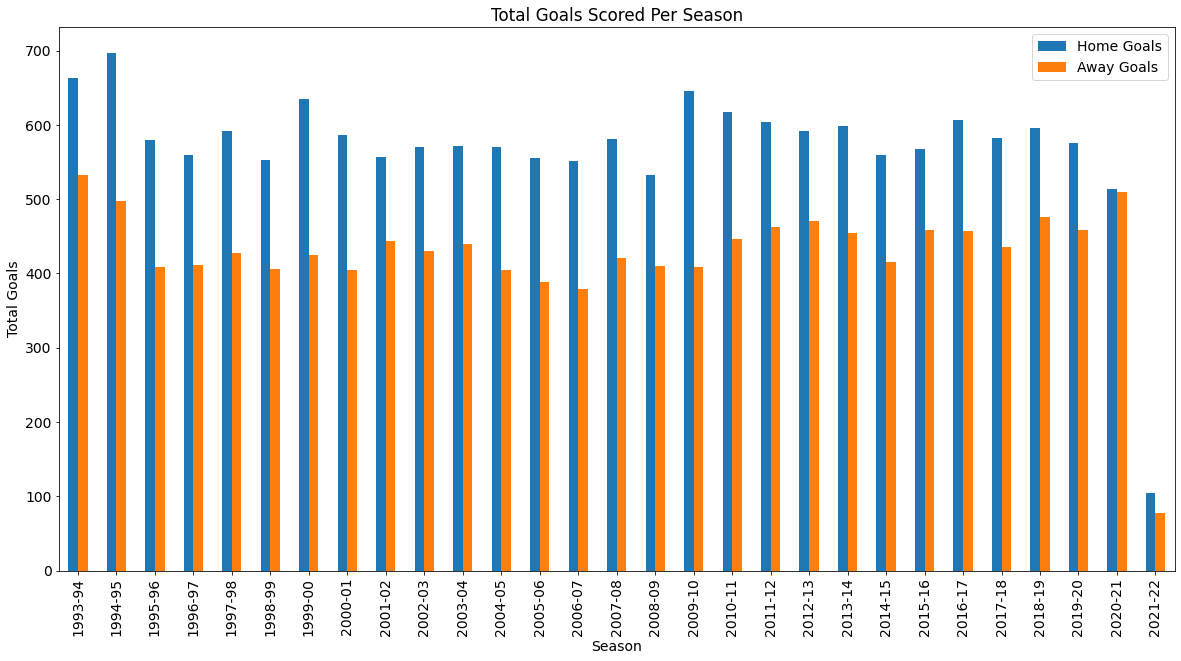

In [12]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
season_data = df[['Season','FTHG', 'FTAG']].groupby('Season').sum().reset_index()
season_data.plot(x="Season", y=["FTHG", "FTAG"], kind="bar")
plt.title('Total Goals Scored Per Season') 
plt.ylabel('Total Goals')
plt.legend(['Home Goals', 'Away Goals'])

###**Insights:**###


*    Goals scored by home team are always more than goals scored by away team.
*   Home Team scored the highest number of goals during the season 1994-95.
*   Away Team scored the highest number of goals during the season 1993-94.
*   Both Home as well as Away team scored the least number of goals during the season 2021-22, where the games were played behind close doors. The absence of fans clearly reflects in the statistics.





######***Univariate Analysis - Season Vs Matches***

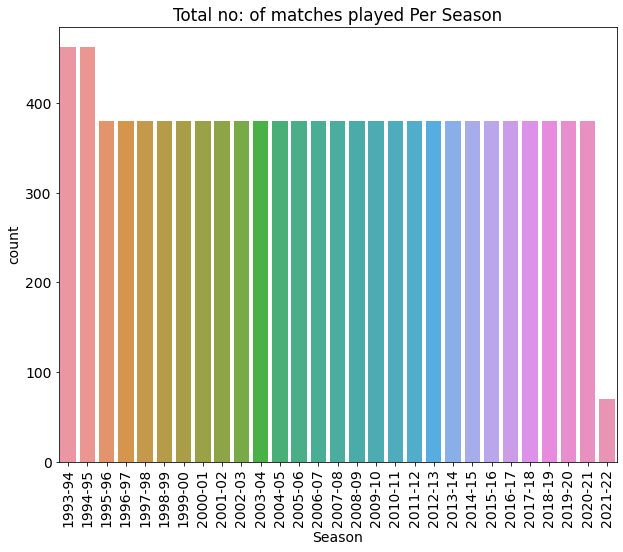

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='Season', data=df)
plt.title('Total no: of matches played Per Season') 
plt.xticks(rotation=90)
plt.show()

###**Insights:**###


*    Most no: of matches played during the seasons 1993-94 and 1994-95.
*    Equal no: of matches played during the seasons from 1995-96 to 2020-21.
*    The lowest no: of matches played during the season 2021-22.

######***Bivariate Analysis - Home Teams Vs Goals***

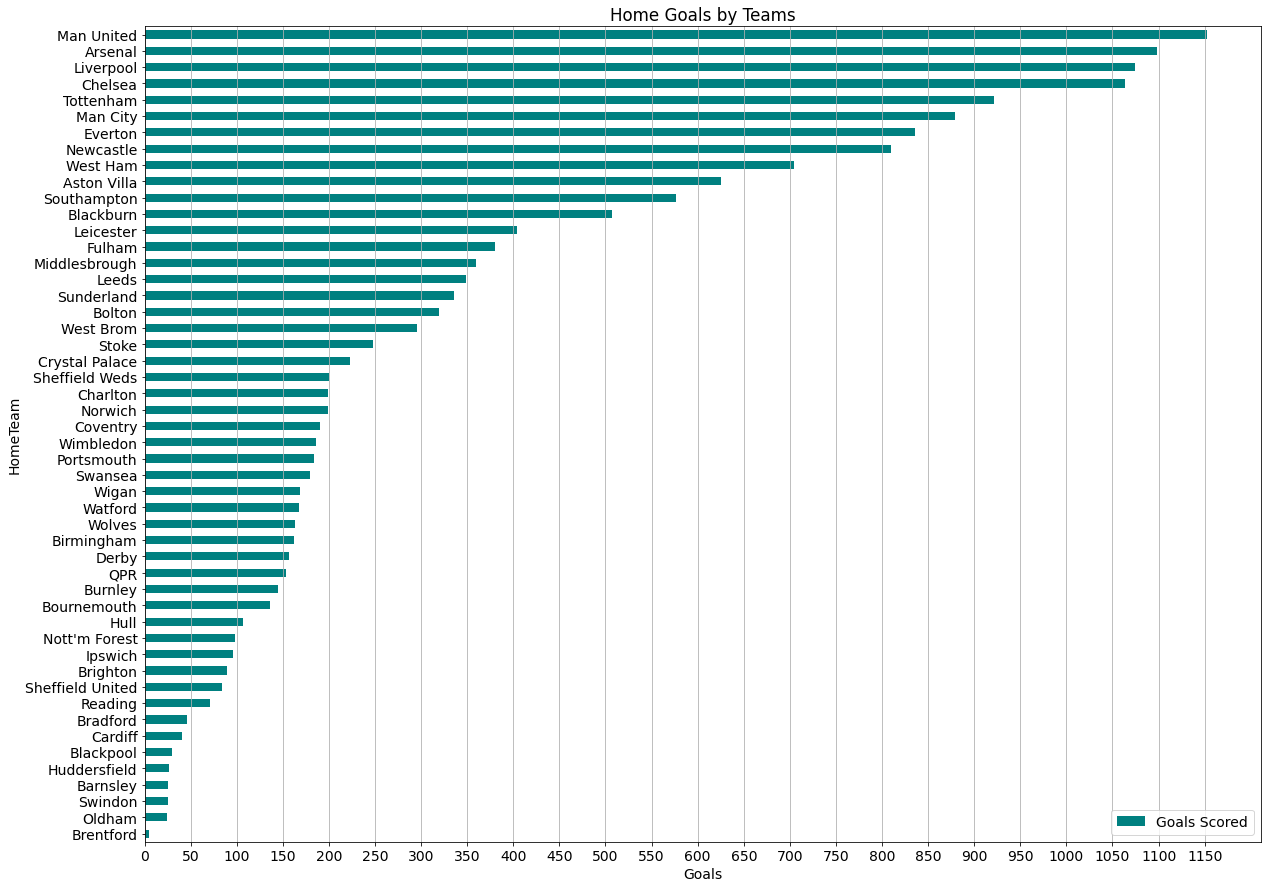

In [14]:
plt.rcParams['figure.figsize'] = (20, 15)
df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=True).plot(kind='barh',xticks=np.arange(0,1200,50),color='teal')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Home Goals by Teams")
plt.legend(['Goals Scored'])

###**Insights:**###


*   The highest number of Goals scored by home team is Manchester United(apprx.1150 goals).
*   The lowest number of Goals scored by home team is Brentford(less than 10 goals).





######***Bivariate Analysis - Away Teams Vs Goals***

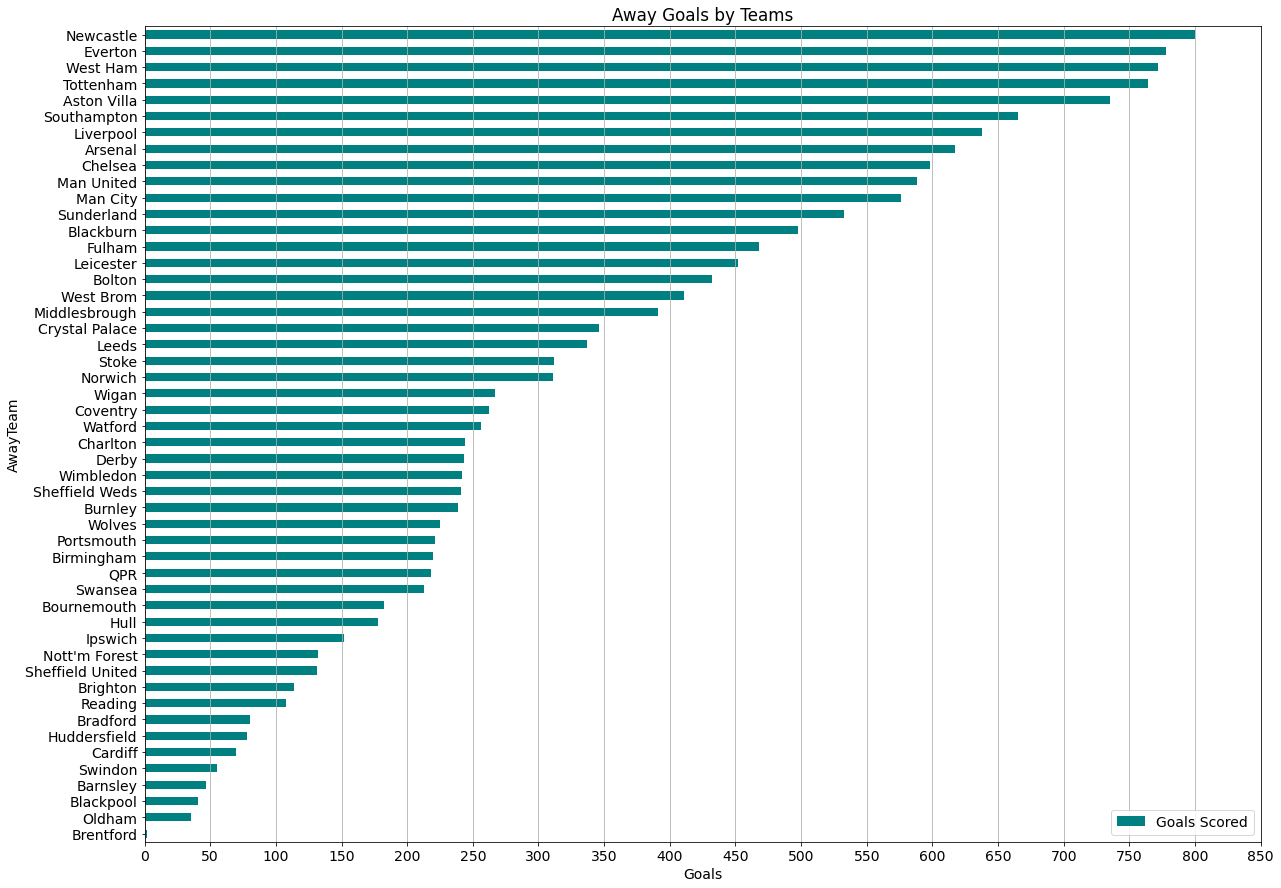

In [15]:
plt.rcParams['figure.figsize'] = (20, 15)
df.groupby('AwayTeam')['FTHG'].sum().sort_values(ascending=True).plot(kind='barh',xticks=np.arange(0,851,50),color='teal')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Away Goals by Teams")
plt.legend(['Goals Scored'])

###**Insights:**###


*   The highest number of Goals scored by home team is Newcastle(apprx.800 goals).
*   The lowest number of Goals scored by home team is Brentford(less  than 10 goals).
*   Manchester United comes in the 10th position.







######***Bivariate Analysis - Top 10 Teams***



In [16]:
toph=df.nlargest(10,'FTHG')
toph=toph.reset_index()
toph.loc[:,['Season','HomeTeam','FTR','HTR','FTHG','HTHG']]

,Season,HomeTeam,FTR,HTR,FTHG,HTHG
0,1994-95,Man United,H,NaN,9,NaN
1,2009-10,Tottenham,H,H,9,1.0
2,2020-21,Man United,H,H,9,4.0
3,1999-00,Newcastle,H,H,8,4.0
4,2007-08,Middlesbrough,H,H,8,2.0
5,2009-10,Chelsea,H,H,8,2.0
6,2011-12,Man United,H,H,8,3.0
7,2012-13,Chelsea,H,H,8,3.0
8,2014-15,Southampton,H,H,8,3.0
9,2019-20,Man City,H,H,8,5.0


###**Insights:**###


*   From the analysis, the team Manchester United came thrice in the top 10 list through different seasons.

######***Bivariate Analysis - Red cards Vs Referee***



In [17]:
import warnings
warnings.filterwarnings('ignore')

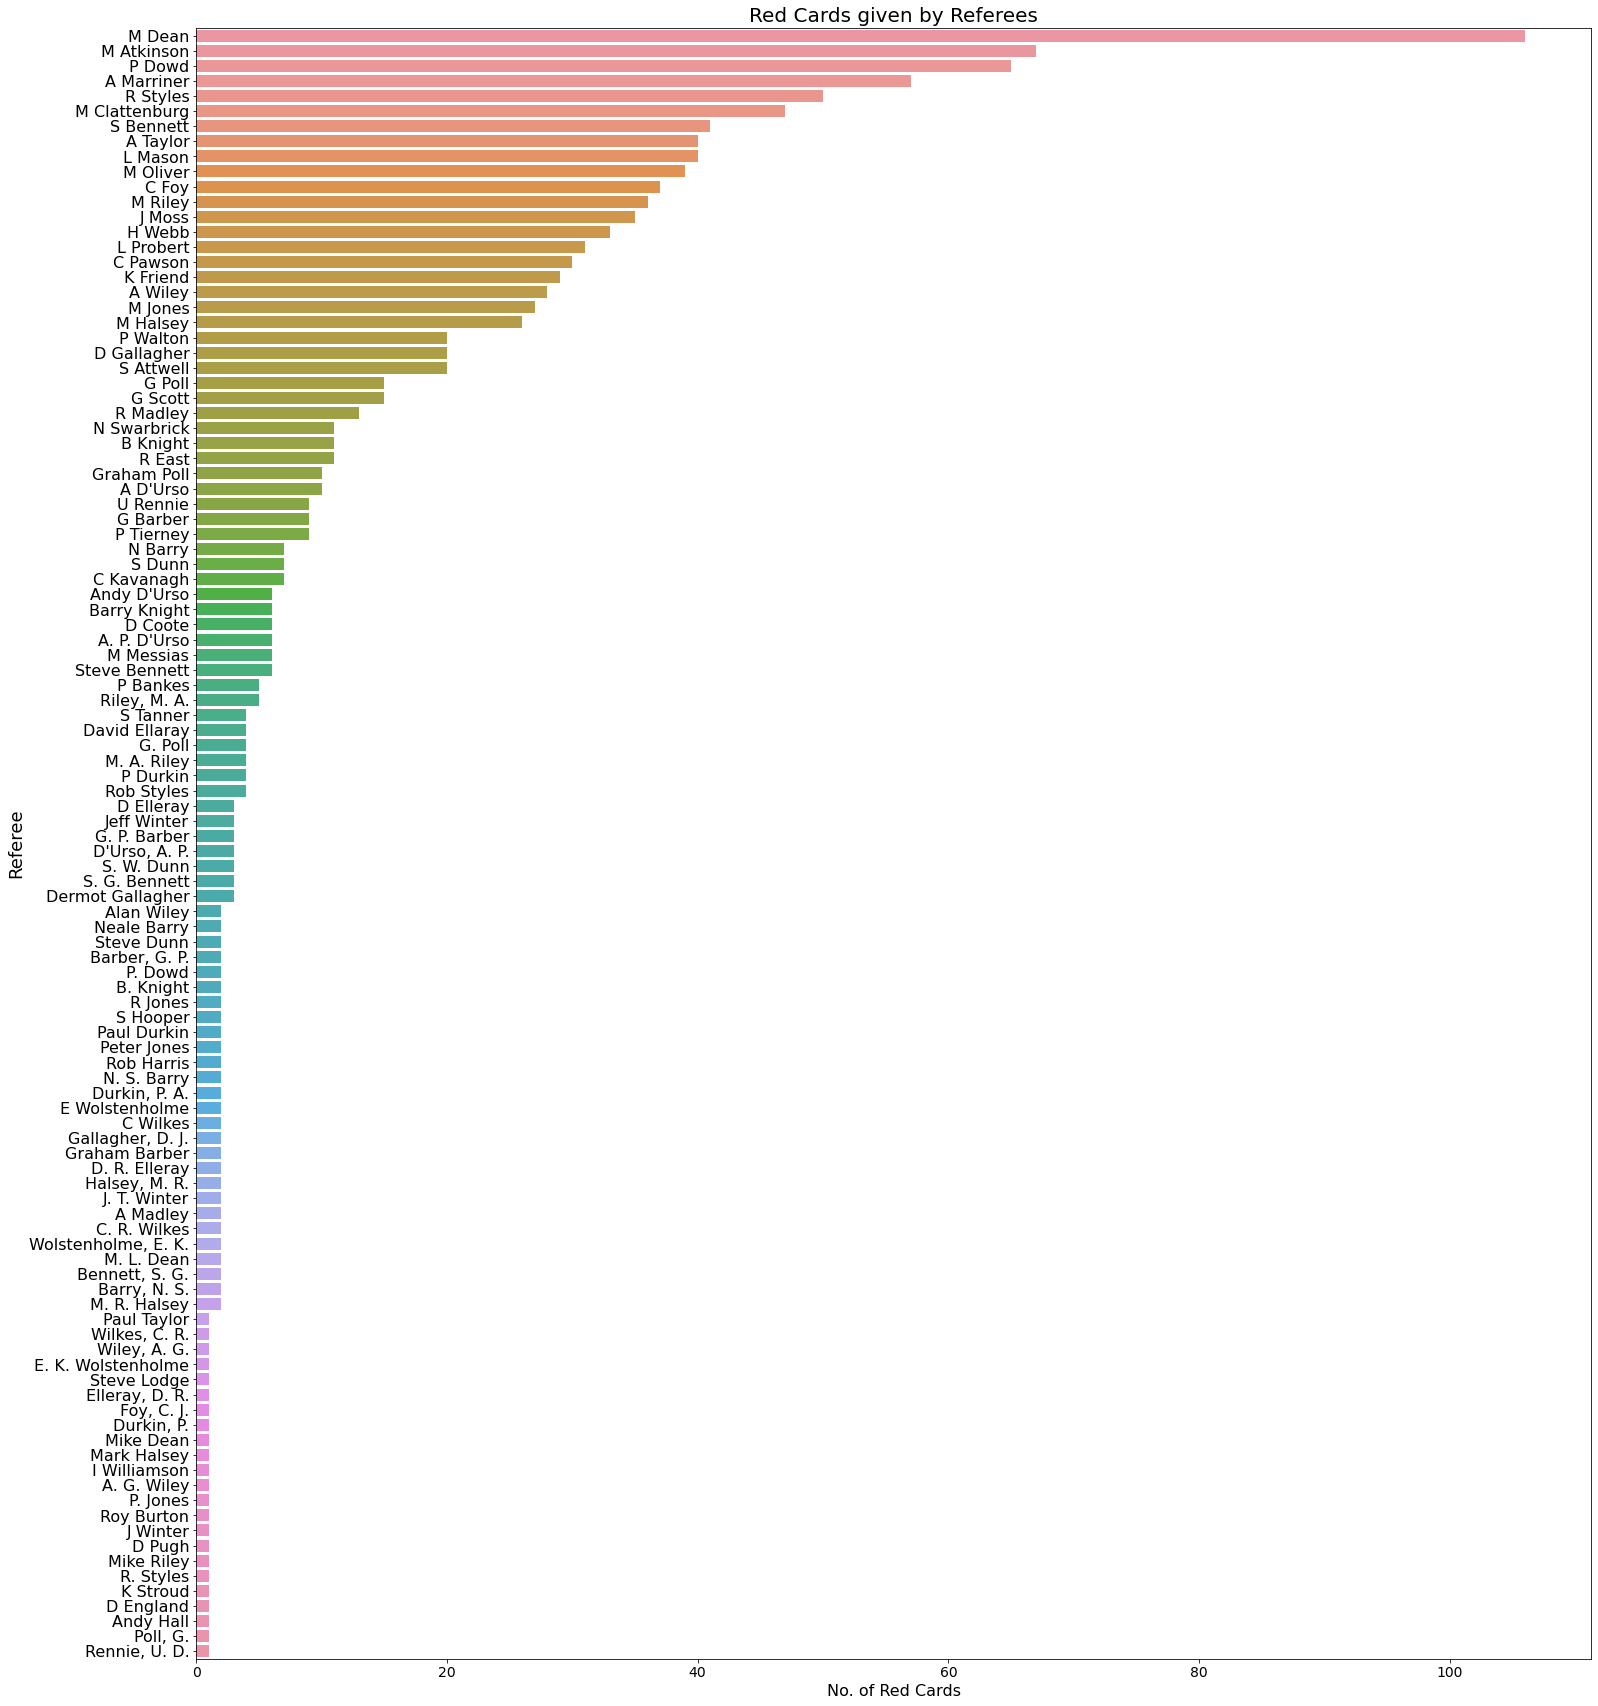

In [18]:
ref = df.groupby(['Referee']).sum().reset_index()
ref['RC'] = ref['HR'] + ref['AR']
ref = ref.loc[ref['RC'] != 0].sort_values(['RC'], ascending=False)
plt.figure(figsize=(25,30))
sns.barplot("RC",'Referee', data =ref )
plt.title('Red Cards given by Referees',size=20)
plt.ylabel('Referee',size=18)
plt.xlabel('No. of Red Cards',size=16)
plt.yticks(size=16)
plt.show()

###**Insights:**###


*   From the analysis, M Dean shows the most no: of Red cards.
*   Rennie U D shows the least no: of Red cards.

######***Bivariate Analysis - Yellow cards Vs Referee***



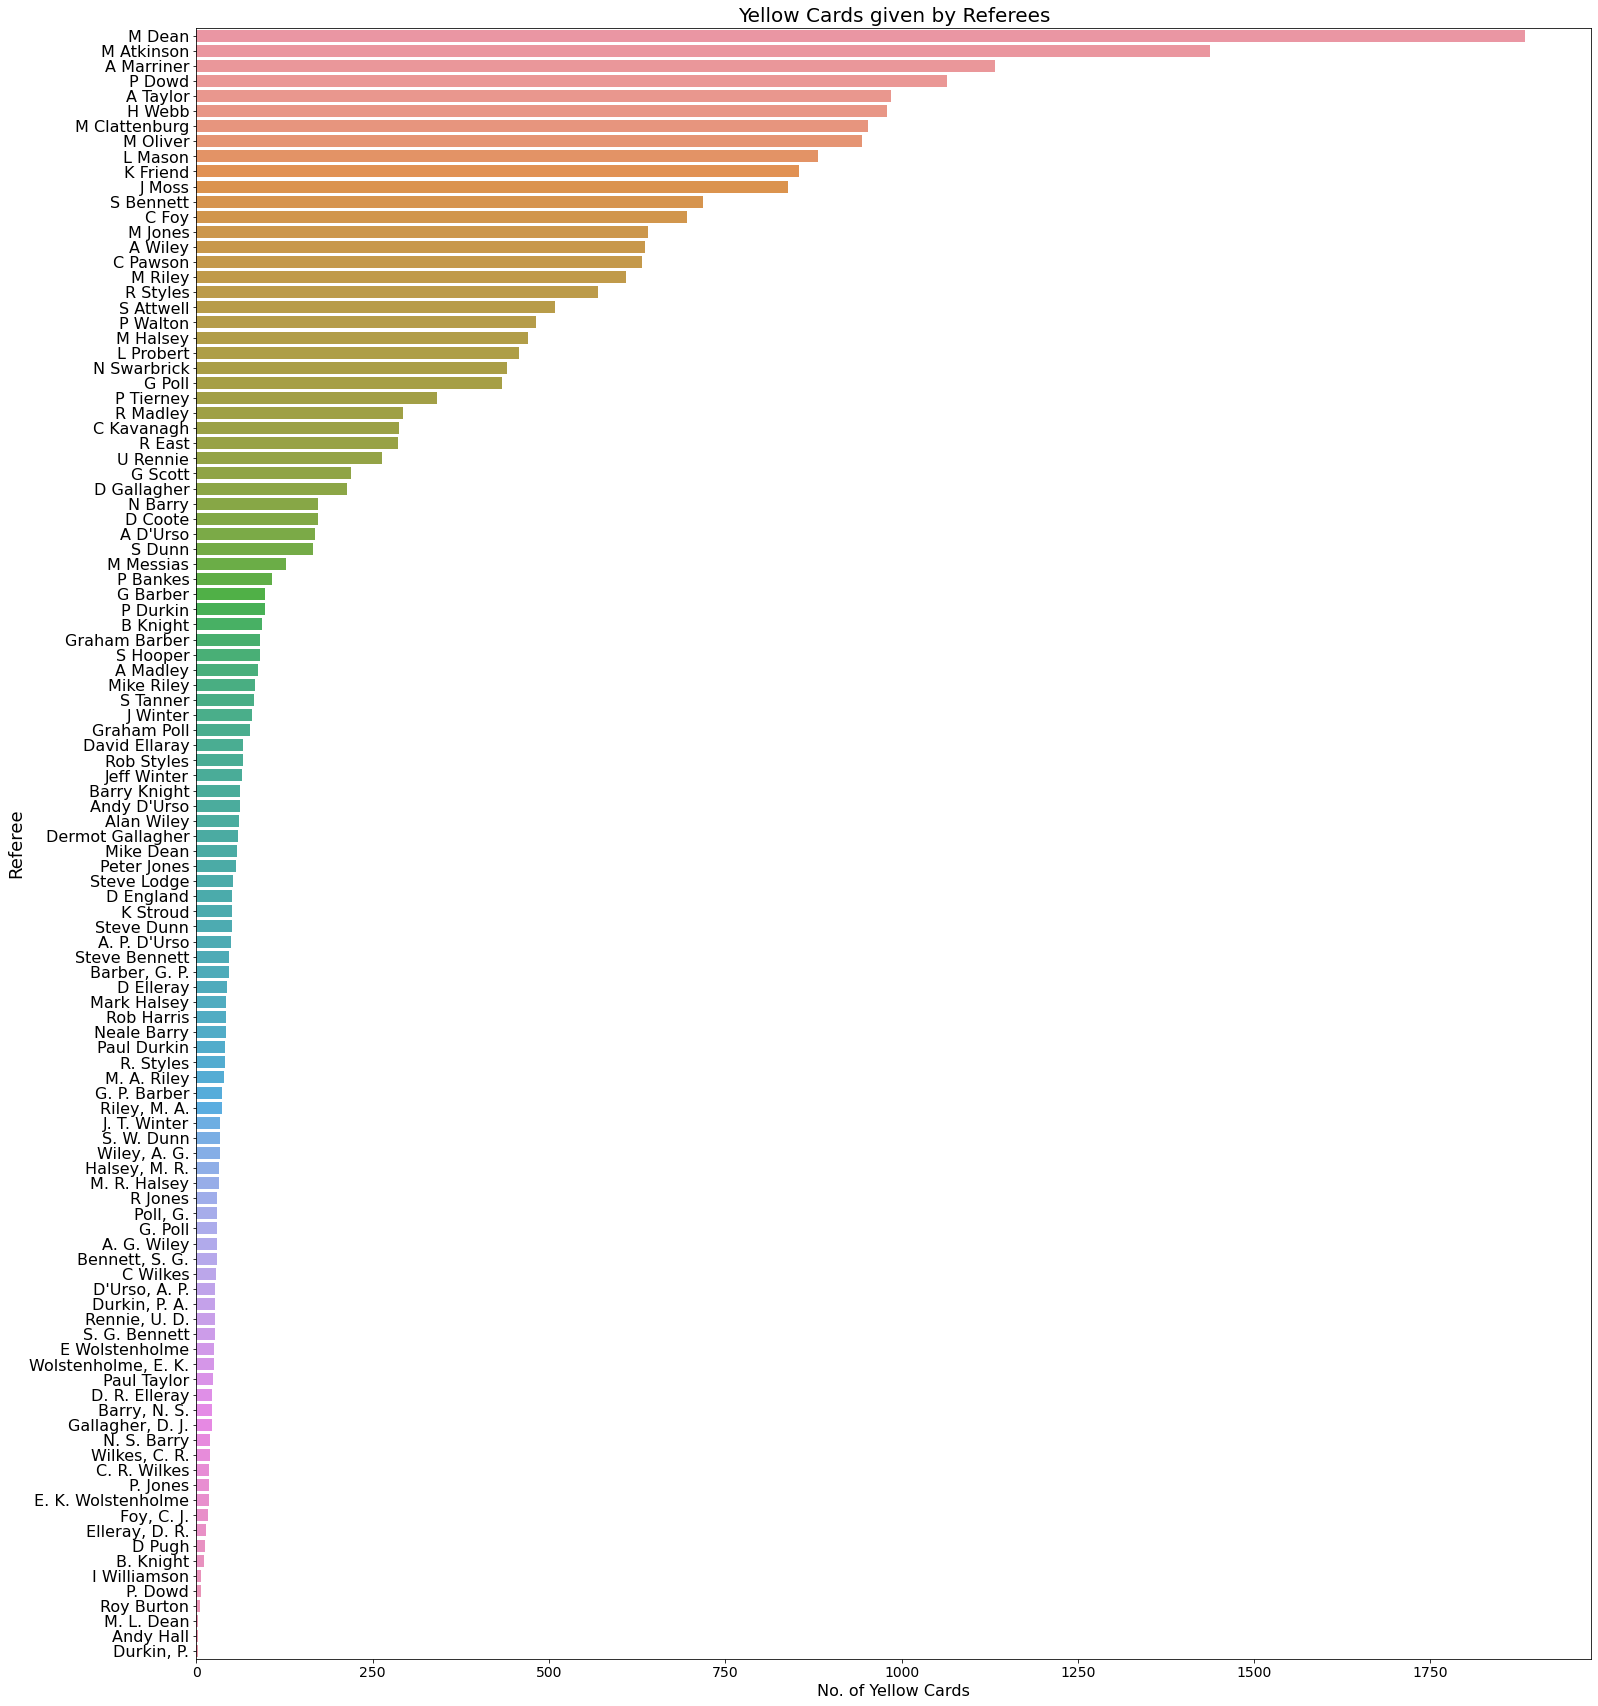

In [19]:
ref['YC'] = ref['HY'] + ref['AY']
ref = ref.loc[ref['YC'] != 0].sort_values(['YC'], ascending=False)
plt.figure(figsize=(25,30))
sns.barplot("YC",'Referee', data =ref )
plt.title('Yellow Cards given by Referees',size=20)
plt.ylabel('Referee',size=18)
plt.xlabel('No. of Yellow Cards',size=16)
plt.yticks(size=16)
plt.show()

###**Insights:**###


*   From the analysis, M Dean shows the most no: of Yellow cards.
*   Durkin P shows the least no: of Yellow cards.

######***Bivariate Analysis - Winning percentage of Home Teams having atleast 1 Red Card***


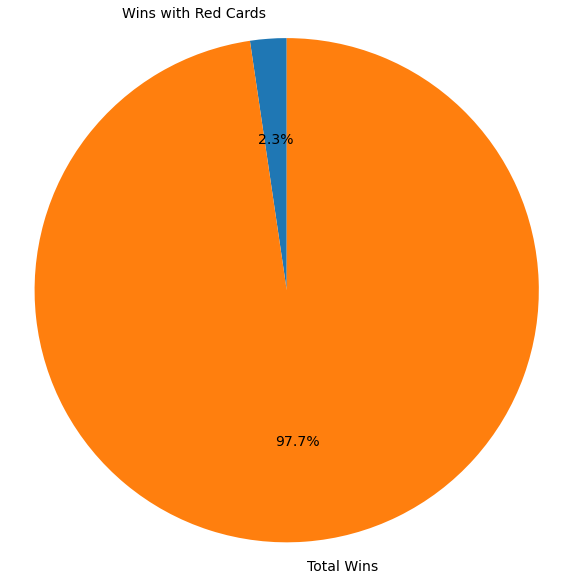

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)
sizes=[df[(df['FTR']=='H') & (df['HR'] == 1)].shape[0], df[(df['FTR']=='H')].shape[0]]
labels= ['Wins with Red Cards', 'Total Wins']
plt.pie(sizes,labels=labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

###**Insights:**###


*   From the analysis, the winning percentage of Home teams having 1 red card is **2.3%**

######***Bivariate Analysis - Home team win percentage***


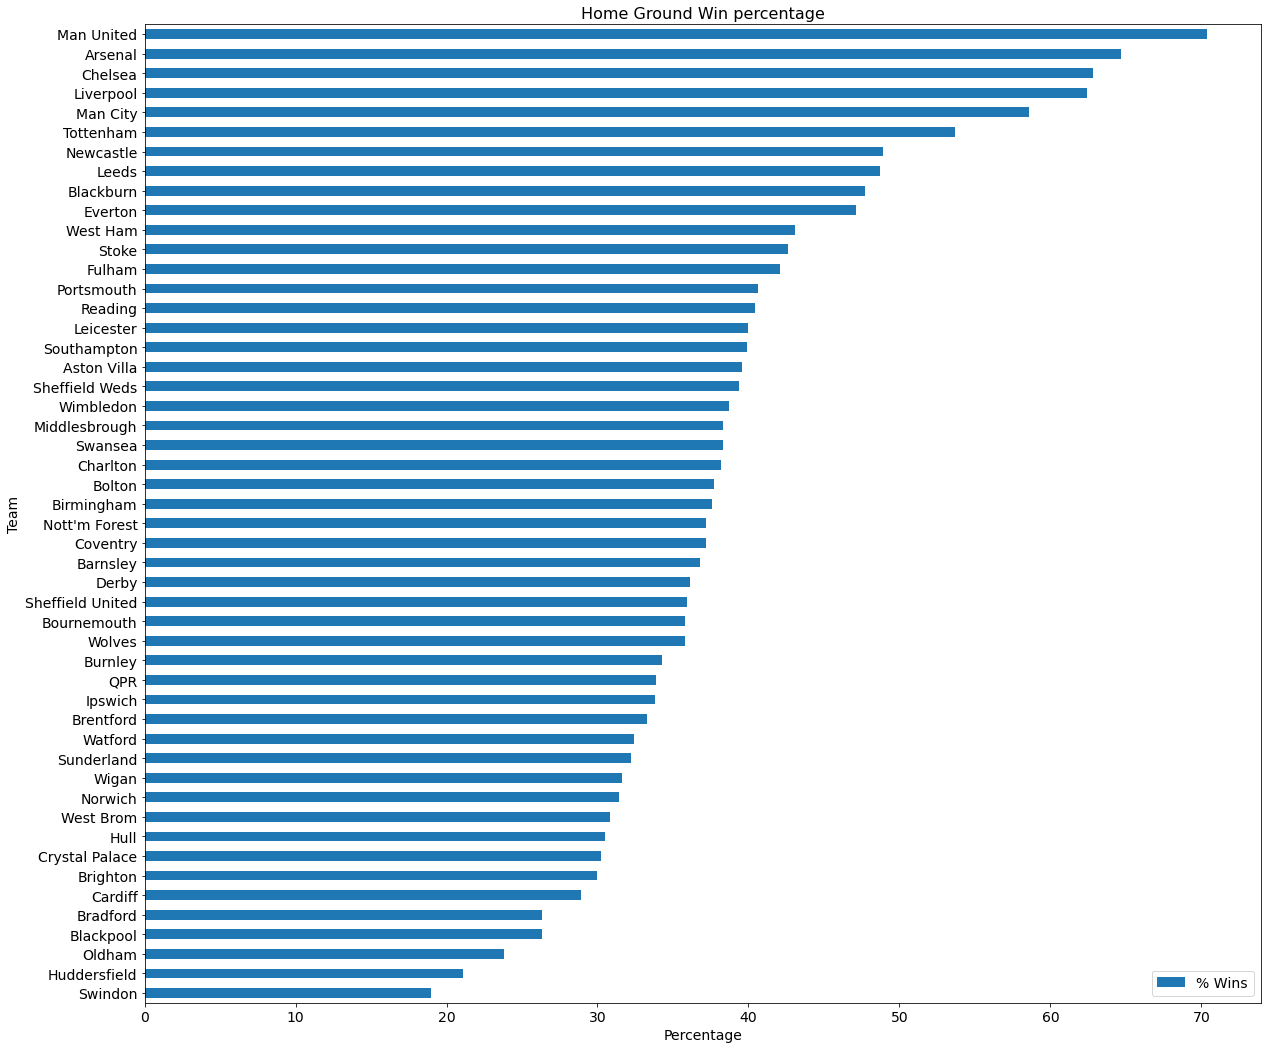

In [21]:
home_win=100*round((df.loc[df['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/df.groupby('HomeTeam')['FTR'].count()),3)
home_win.sort_values(ascending = False)
plt.figure(figsize=(20,18))
home_win.sort_values(ascending=True).plot(kind = 'barh')
plt.xlabel('Percentage',size=14)
plt.ylabel('Team',size=14)
plt.legend(['% Wins'])
plt.title("Home Ground Win percentage",size=16)
plt.show()

###**Insights:**###


*   Manchester United is 70% sure they are going to win if they are playing from Home ground.

######***Bivariate Analysis - Teams played last 5 Seasons***


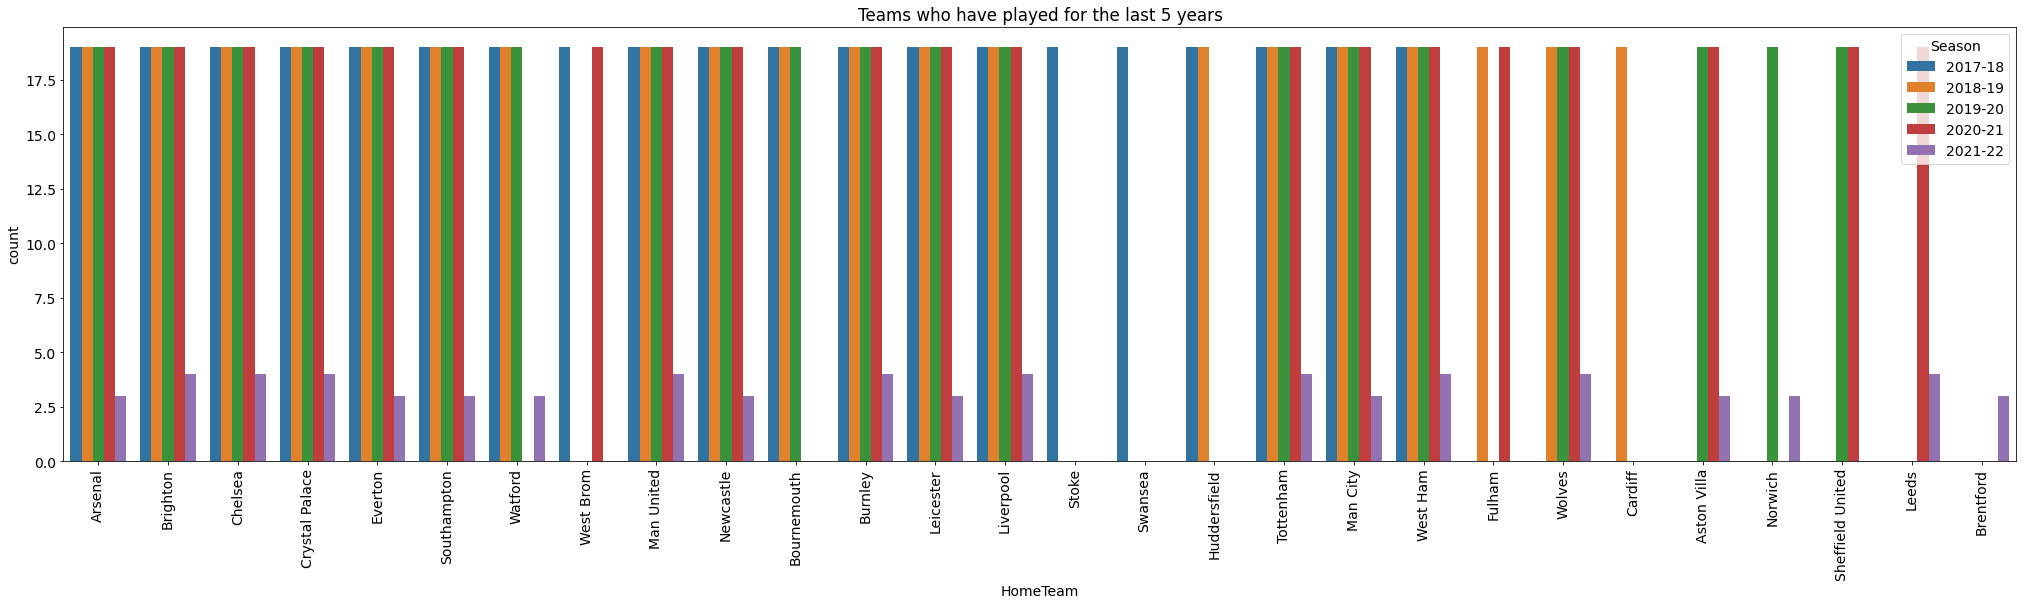

In [22]:
plt.figure(figsize=(35,8))
sns.countplot(x='HomeTeam', hue='Season', data=df[(df['Season']>='2017-18') & (df['Season']<='2021-22')])
plt.title('Teams who have played for the last 5 years') 
plt.xticks(rotation=90)
plt.show()

###**Insights:**###


*   Around 14 teams have played the last 5 Seasons.
*   Brentford seems to be like a new team who played first time in the season 2021-22.



##**3. Data Pre-processing**

###**3.1 Missing Values**

######***Checking for Null values***

In [23]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Season,0
DateTime,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,924
HTAG,924
HTR,924


######***Filling missing values for the numerical features by using Median***

In [24]:
for i in ['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']:
    df[i] = df[i].fillna(df[i].median())

######***Finding missing categorical variables***

In [25]:
missing_categorical = [var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtypes =='O']
print("The categorical variables having null values:",missing_categorical)

The categorical variables having null values: ['HTR', 'Referee']


######***A barplot of HTR***

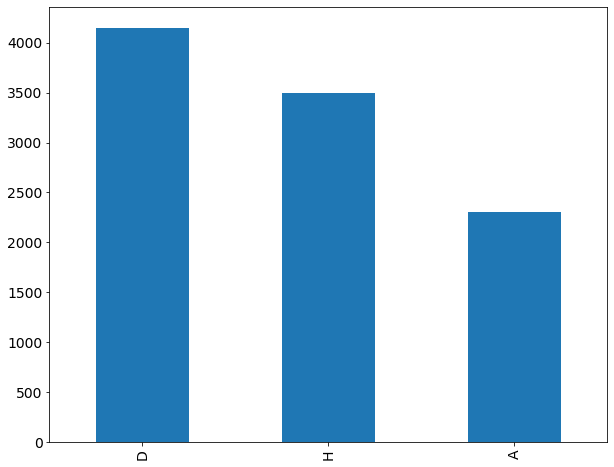

In [26]:
plt.figure(figsize=(10,8))
df['HTR'].value_counts().plot.bar()

In [27]:
df['HTR'].mode()

0    D
dtype: object

######***From the above bar plot we can see that D has highest frequency, so we can fill all the missing values with D***

In [28]:
df['HTR'].fillna('D', inplace=True)

######***Finding Referee having highest frequency***

In [29]:
df['Referee'].value_counts().to_frame('Most frequently occurred values')

,Most frequently occurred values
M Dean,508
M Atkinson,439
A Marriner,363
P Dowd,301
M Oliver,300
...,...
M Atkinson,1
N Barry,1
S Dunn,1
I Williamson,1


In [30]:
df['Referee'].mode()

0    M Dean
dtype: object

######***Filling missing values with M Dean***

In [31]:
df['Referee'].fillna('M Dean', inplace=True)

######***Checking whether the Null values are filled or not***

In [32]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Season,0
DateTime,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,0
HTAG,0
HTR,0


###**3.2 Outlier Detection**

######***Removing the inactive teams since 2000***

######***These are the active teams from 2000***

In [33]:
teams=df[df['Season']>='2000-01']['HomeTeam'].unique()
teams

array(['Charlton', 'Chelsea', 'Coventry', 'Derby', 'Leeds', 'Leicester',
       'Liverpool', 'Sunderland', 'Tottenham', 'Man United', 'Arsenal',
       'Bradford', 'Ipswich', 'Middlesbrough', 'Everton', 'Man City',
       'Newcastle', 'Southampton', 'West Ham', 'Aston Villa', 'Bolton',
       'Blackburn', 'Fulham', 'Birmingham', 'West Brom', 'Portsmouth',
       'Wolves', 'Norwich', 'Crystal Palace', 'Wigan', 'Reading',
       'Sheffield United', 'Watford', 'Hull', 'Stoke', 'Burnley',
       'Blackpool', 'QPR', 'Swansea', 'Cardiff', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

######***We are going to select only the teams that are active since 2000 and going to remove the teams that have not played since***

In [34]:
df1=pd.DataFrame()
df1=df[(df.HomeTeam.isin(teams)) & (df.AwayTeam.isin(teams))]

In [35]:
df1['GoalDif']= df1['FTHG']- df1['FTAG']

In [36]:
df1

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,GoalDif
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,0.0,0.0,D,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,-3
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,0.0,0.0,D,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,3
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,0.0,0.0,D,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,-1
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,0.0,0.0,D,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,0
5,1993-94,1993-08-14T00:00:00Z,Newcastle,Tottenham,0,1,A,0.0,0.0,D,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,2021-22,2021-10-02T17:30:00Z,Brighton,Arsenal,0,0,D,0.0,0.0,D,...,2.0,8.0,5.0,8.0,5.0,2.0,1.0,0.0,0.0,0
10870,2021-22,2021-10-03T14:00:00Z,Crystal Palace,Leicester,2,2,D,0.0,2.0,A,...,5.0,1.0,3.0,15.0,11.0,2.0,3.0,0.0,0.0,0
10871,2021-22,2021-10-03T14:00:00Z,Tottenham,Aston Villa,2,1,H,1.0,0.0,H,...,3.0,5.0,8.0,11.0,14.0,2.0,1.0,0.0,0.0,1
10872,2021-22,2021-10-03T14:00:00Z,West Ham,Brentford,1,2,A,0.0,1.0,A,...,6.0,11.0,6.0,16.0,13.0,2.0,3.0,0.0,0.0,-1


######***Now we have 10092 records and removed the inactive teams***
######***Checking for Outliers***

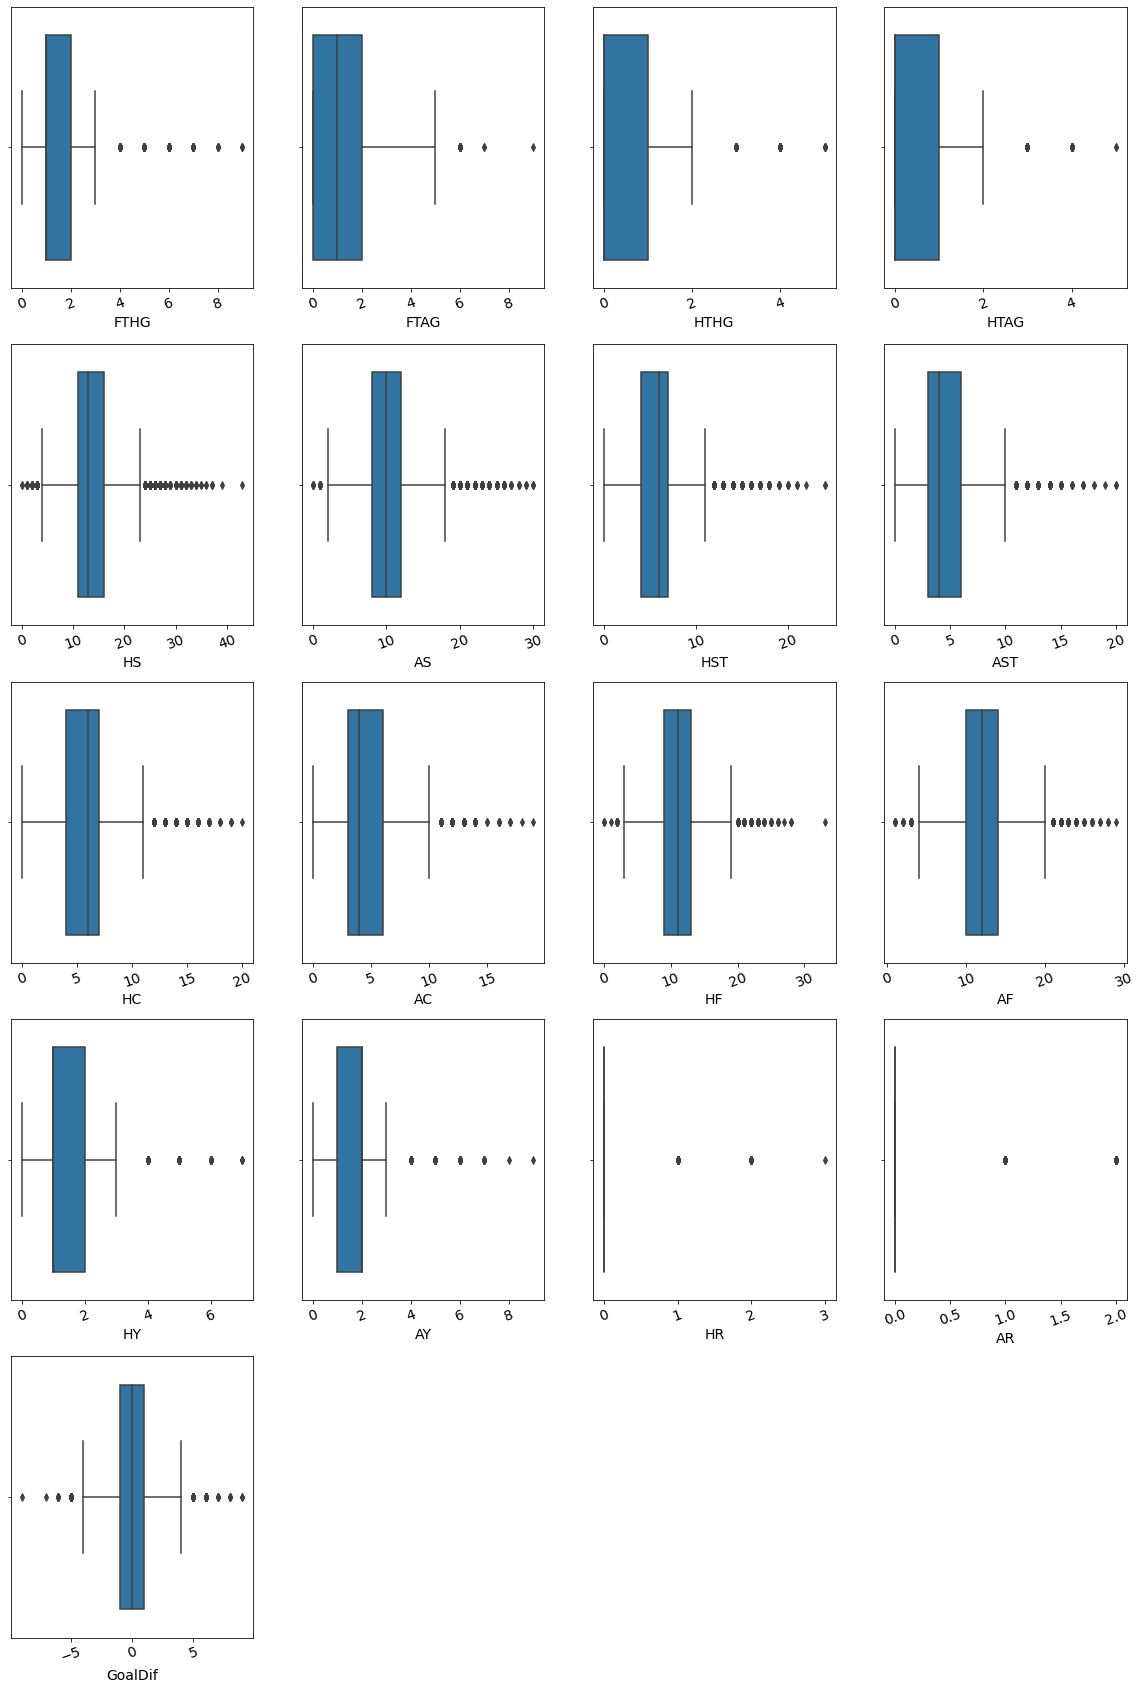

In [37]:
plt.figure(figsize=(20,30))
features = ['FTHG', 'FTAG', 'HTHG', 'HTAG',  'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'GoalDif']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation = 20)

######***Handling Outliers using Median Imputation***

In [38]:
for i in ['FTHG', 'FTAG', 'HTHG', 'HTAG',  'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'GoalDif']:
    Q1=df1[i].quantile(0.25)  
    Q3=df1[i].quantile(0.75)    
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR    
    for j in df1[i]:    
       if j > up_limit or j < low_limit:     
            df1[i] = df1[i].replace(j, np.median(df1[i]))                   

######***Checking whether the Outliers are removed or not***

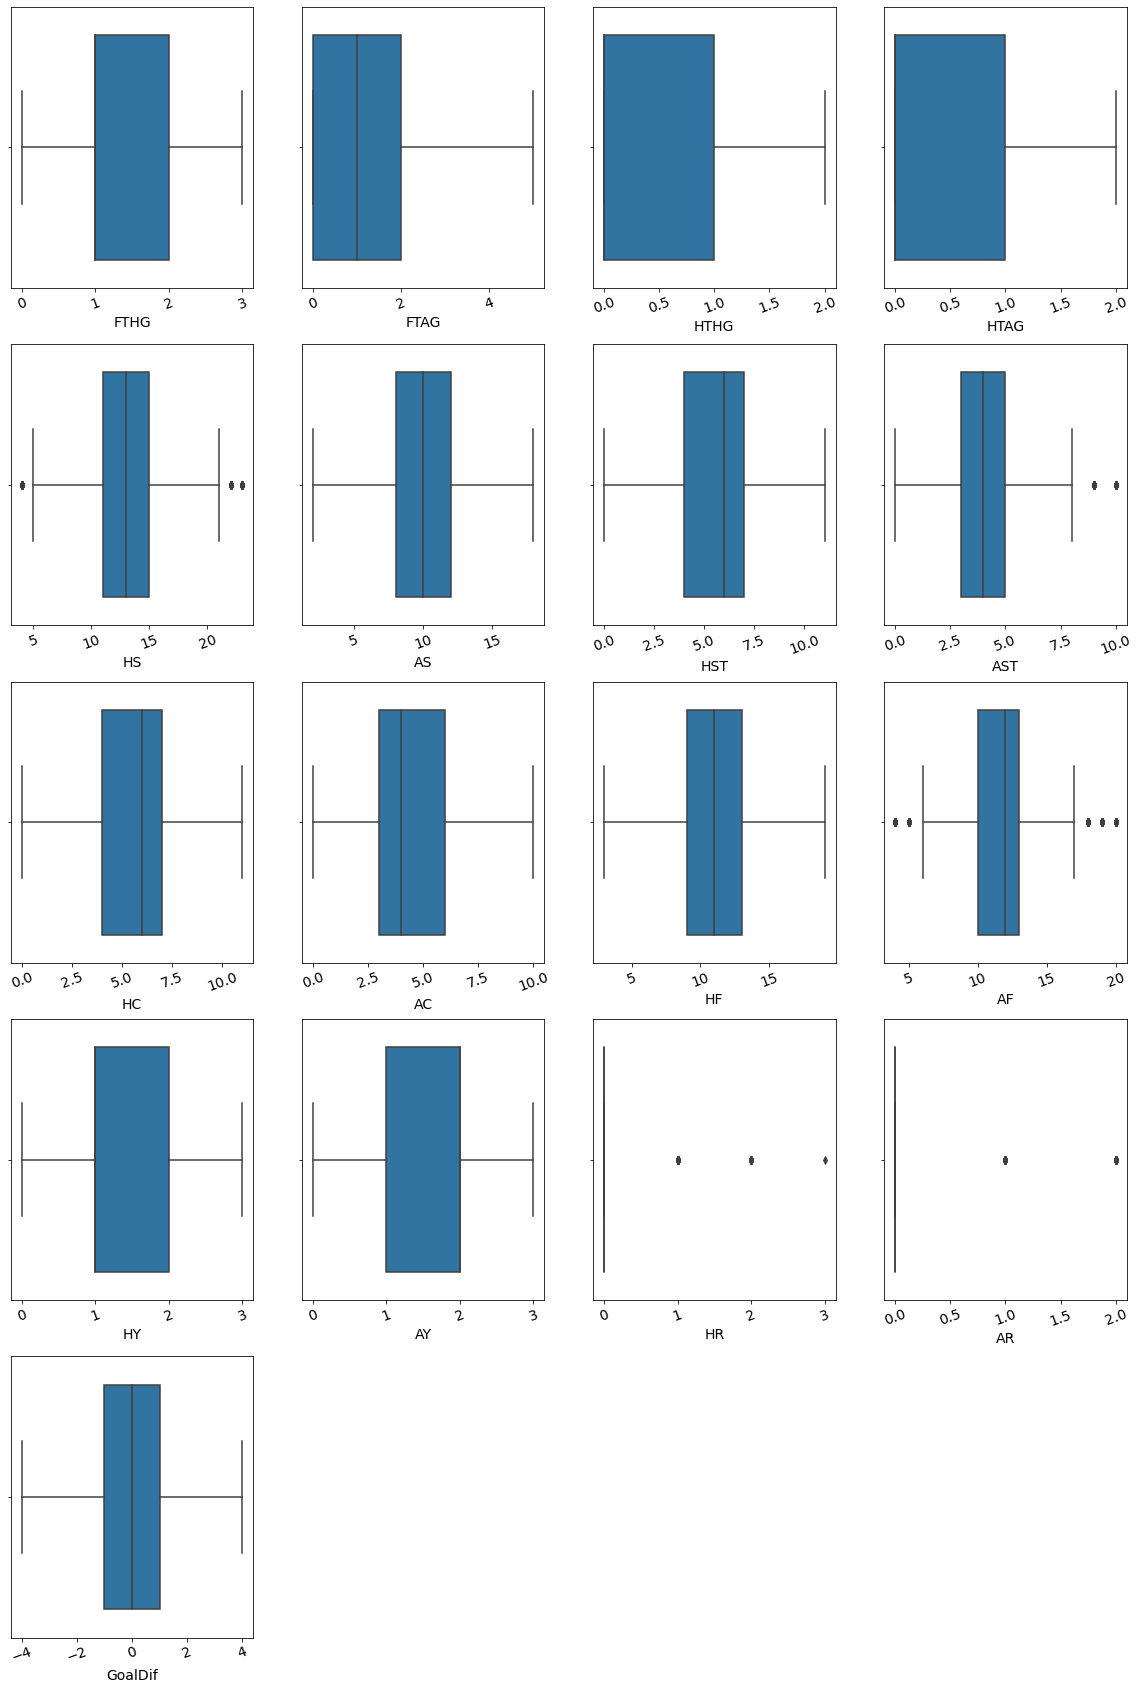

In [39]:
plt.figure(figsize=(20,30))
features = ['FTHG', 'FTAG', 'HTHG', 'HTAG',  'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'GoalDif']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation = 20)

###**3.3 Feature Encoding**

######***Getting a list of column names from feature dataframe which are suitable for label encoding***

In [40]:
EPL_data_Cols = []
for i in list(df.columns):
    if df1[i].dtype == 'O' and len(df1[i].unique()) > 2:
        EPL_data_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',EPL_data_Cols)

The below given list of columns needs a Label Encoding:
 ['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']


######***Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing***

In [41]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in EPL_data_Cols:
    df1[i] = labelencoder.fit_transform(df1[i])

######***Replacing the original columns in the feature dataframe with encoded columns***

In [42]:
# Sample preview of the feature dataframe
df1.sample(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,GoalDif
5635,14,1404,17,18,3,0,2,0.0,0.0,1,...,4.0,6.0,7.0,9.0,9.0,0.0,2.0,0.0,0.0,3
4840,12,1196,12,26,1,3,0,0.0,1.0,0,...,7.0,4.0,3.0,13.0,11.0,0.0,2.0,0.0,0.0,-2
9442,24,2414,26,25,1,2,0,1.0,1.0,1,...,7.0,2.0,8.0,16.0,10.0,1.0,2.0,0.0,0.0,-1
2012,4,470,24,15,2,1,2,1.0,0.0,2,...,4.0,6.0,4.0,11.0,12.0,1.0,2.0,0.0,0.0,1
9882,25,2535,38,26,0,1,0,0.0,1.0,0,...,8.0,7.0,4.0,8.0,8.0,1.0,2.0,0.0,0.0,-1


###**3.4 Feature Reduction**

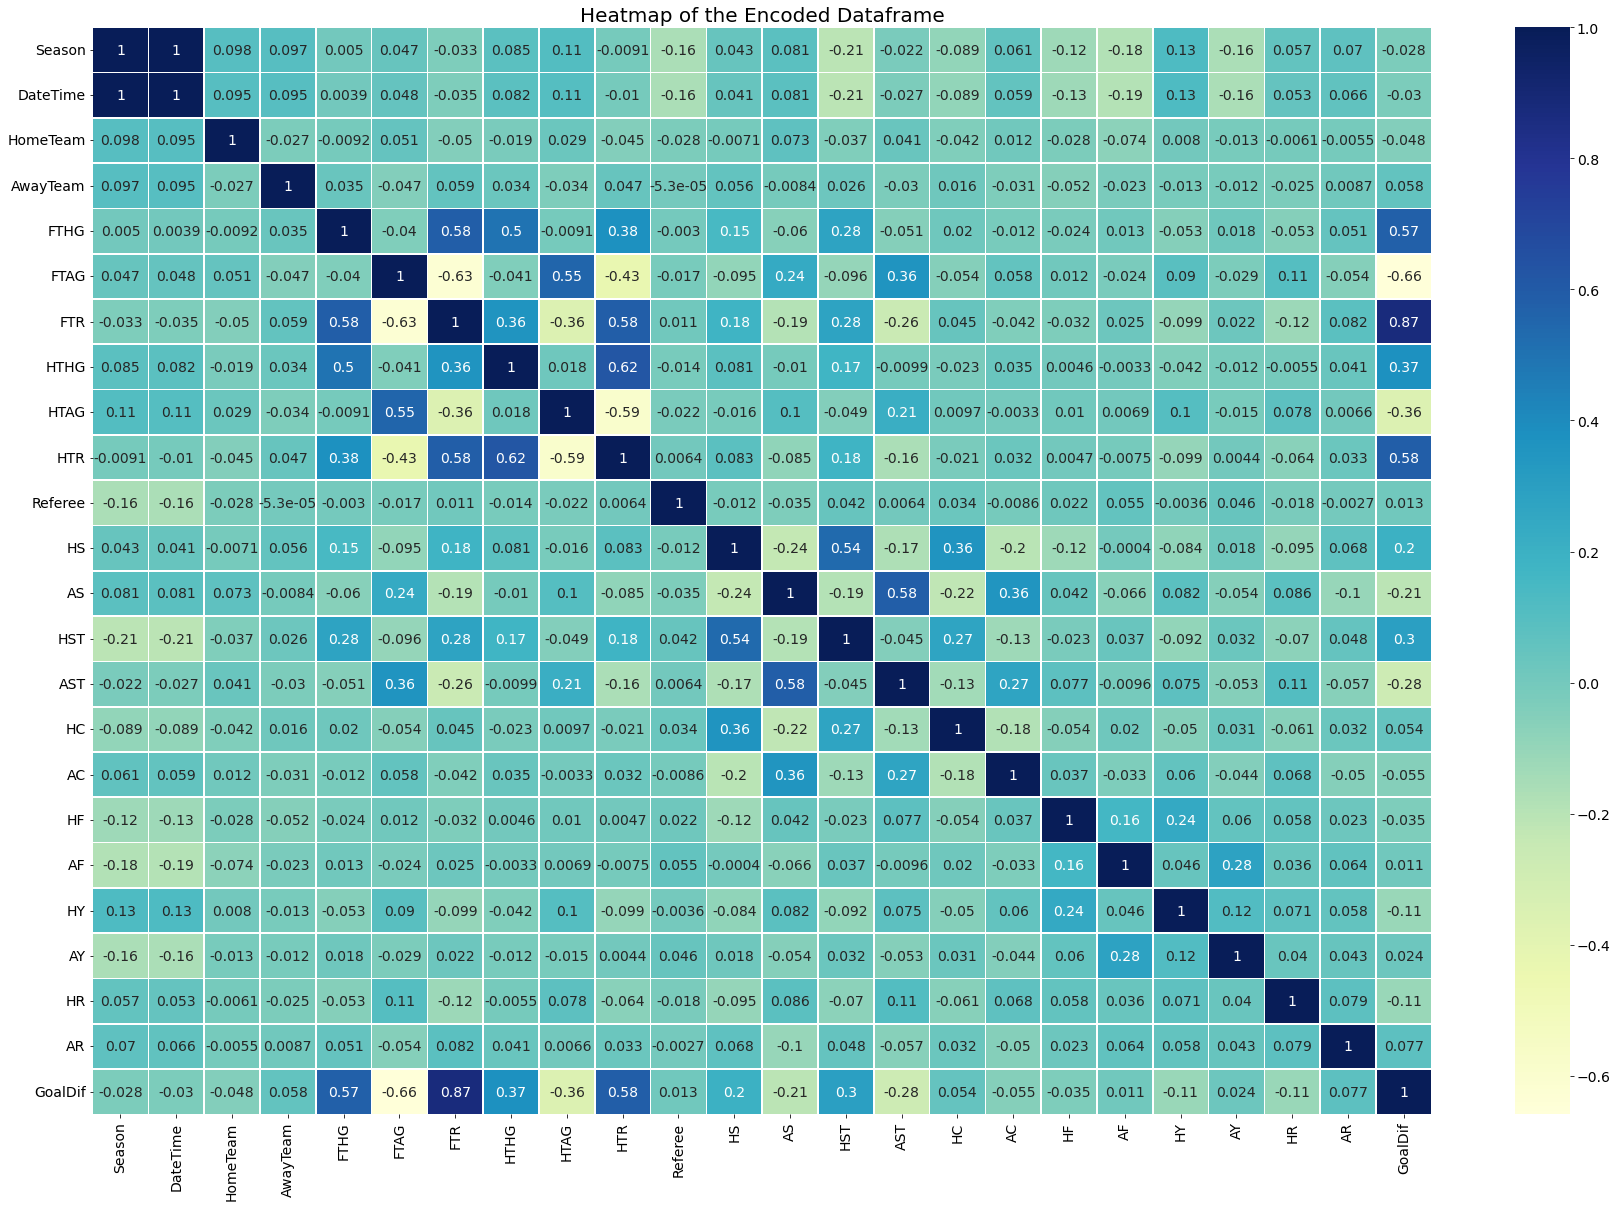

In [43]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = df1.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.figure(figsize=(30,20))
plt.title('Heatmap of the Encoded Dataframe', fontsize=20)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap="YlGnBu")

######***Removing features which not relevant***

In [44]:
df1.drop()

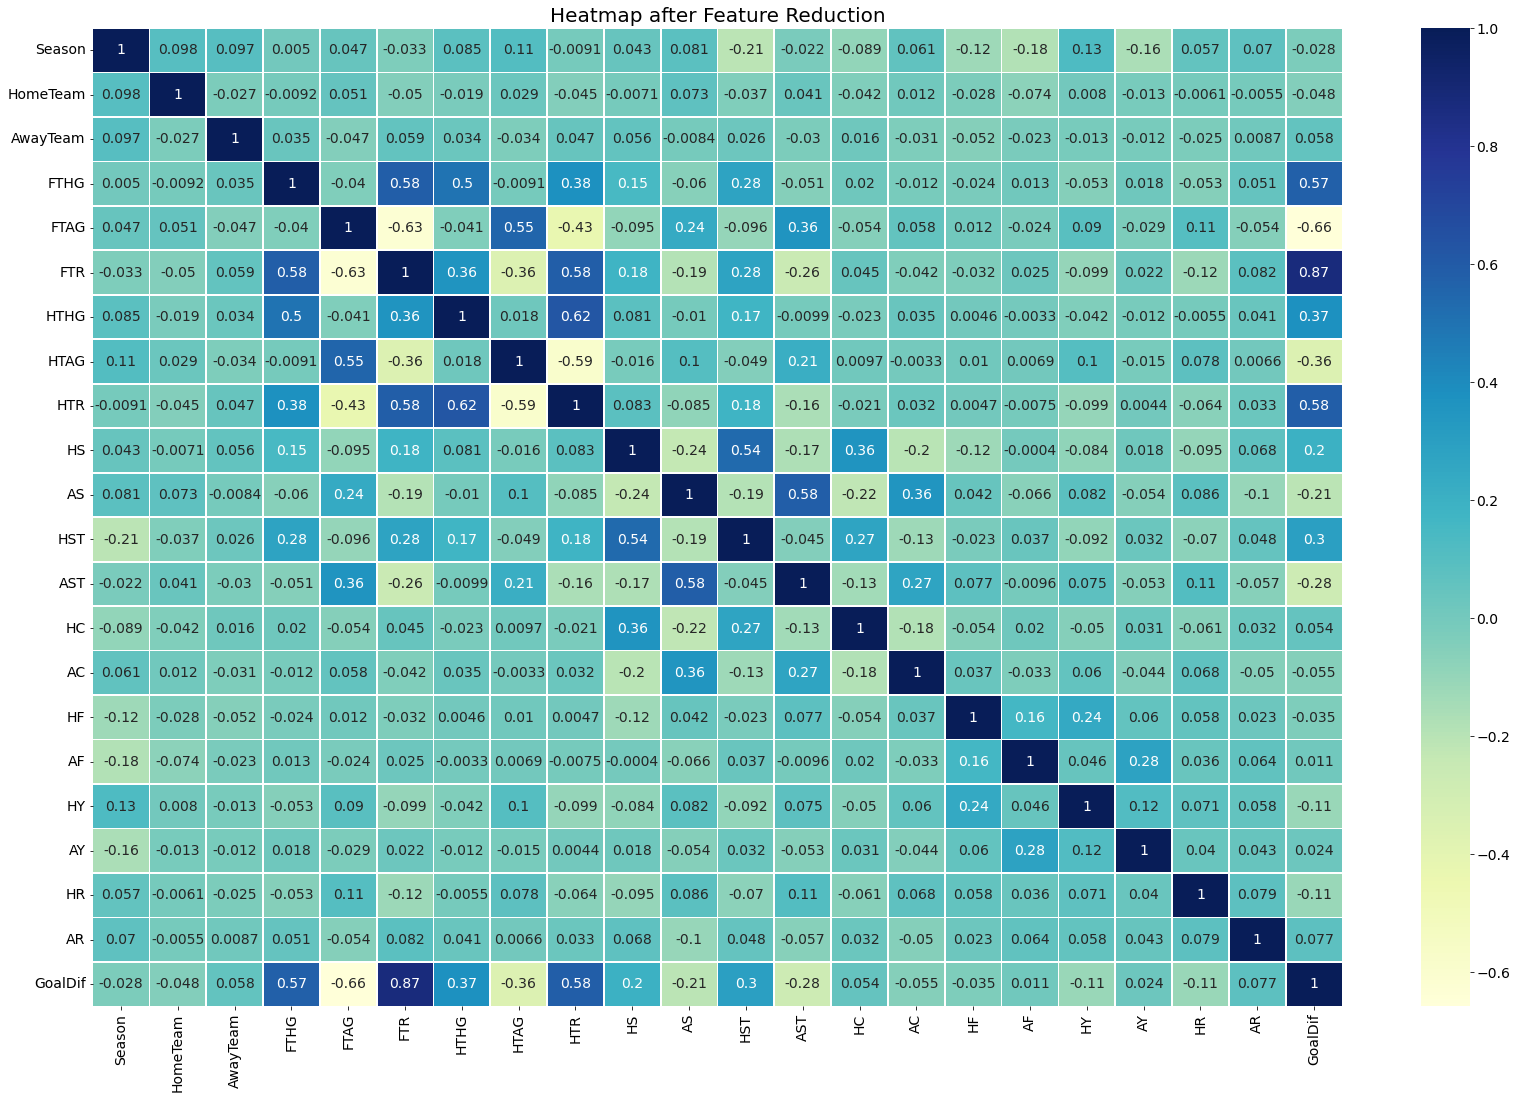

In [45]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = df1.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.figure(figsize=(28,18))
plt.title('Heatmap after Feature Reduction', fontsize=20)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap="YlGnBu")

###**3.5 Standardization**

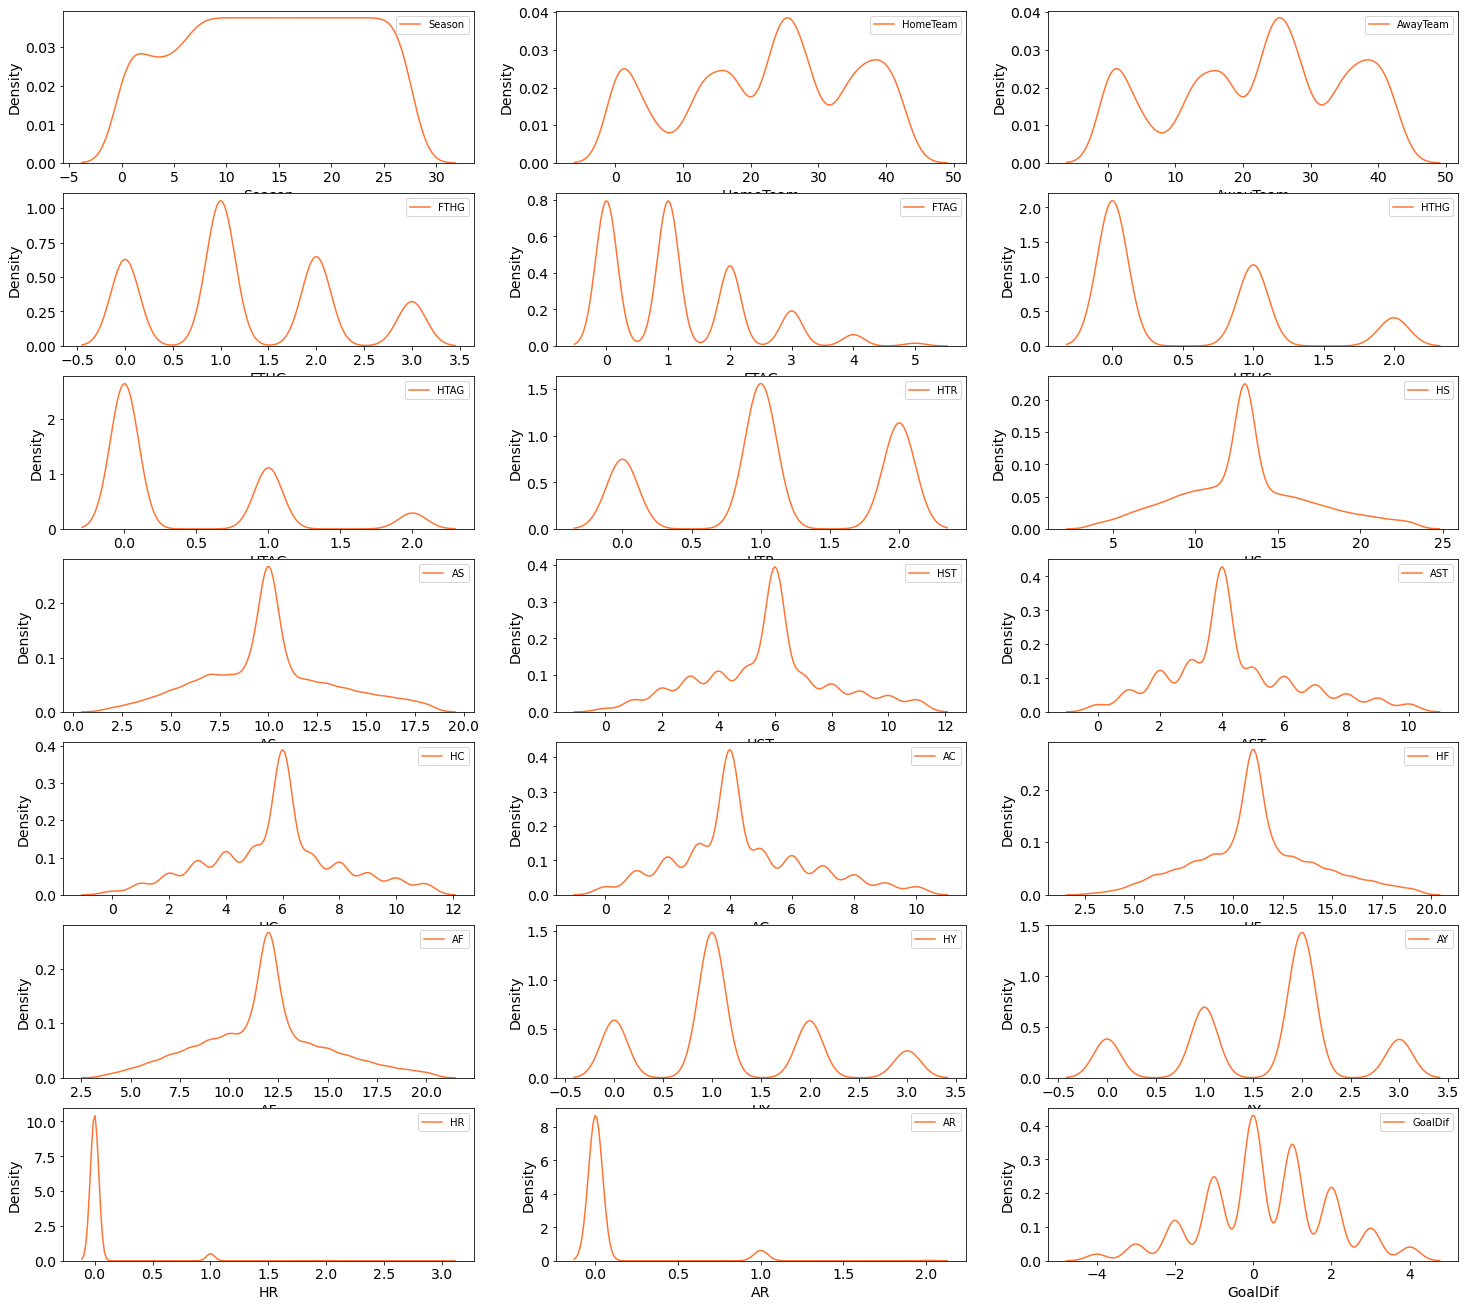

In [46]:
plt.figure(figsize=(25,23))
plt.title('Before Scaling', fontsize=18)
features = ['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'GoalDif']
for i in enumerate(features): 
    ax = plt.subplot(7, 3, i[0]+1)   
    sns.kdeplot(df1[i[1]], color ='#FF7433', label=i[1])
    plt.legend(fontsize=10)

######***Min-Max Scaling***

In [47]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
for i in ['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'GoalDif']:
    df1[[i]] = min_max.fit_transform(df1[[i]])

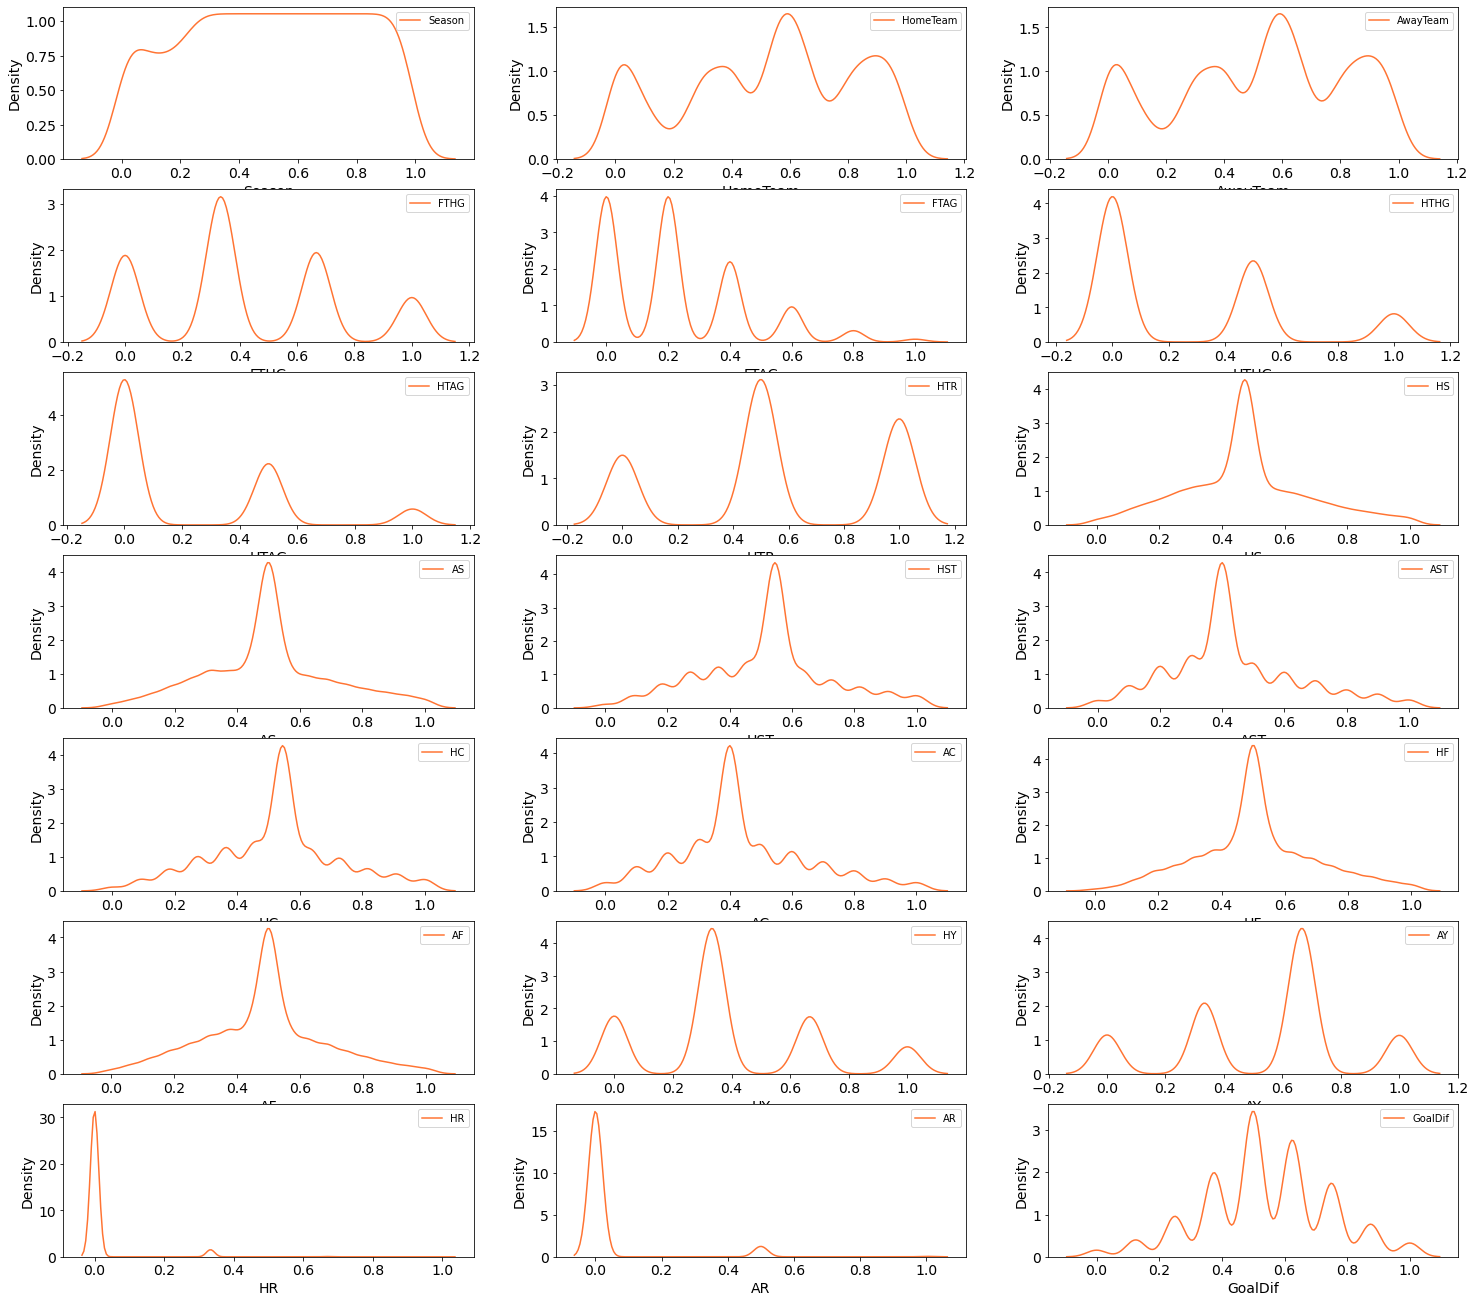

In [48]:
plt.figure(figsize=(25,23))
plt.title('After Scaling', fontsize=18)
features = ['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'GoalDif']
for i in enumerate(features): 
    ax = plt.subplot(7, 3, i[0]+1)   
    sns.kdeplot(df1[i[1]], color ='#FF7433', label=i[1])
    plt.legend(fontsize=10)

###**3.6 Feature Engineering**

######***Selecting the most relevant features used for predictive modeling***

In [49]:
y = df1['FTR']
X = df1.drop(['Season', 'FTHG', 'FTAG', 'HTHG', 'HTAG',  'HY', 'AY', 'FTR'], axis=1)

In [50]:
X.sample(5)

,HomeTeam,AwayTeam,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HR,AR,GoalDif
3380,0.302326,0.116279,1.0,0.631579,0.500,0.454545,0.4,0.363636,0.4,0.2500,0.5000,0.0,0.0,1.000
8917,0.813953,0.581395,0.0,0.210526,0.625,0.272727,0.6,0.636364,0.7,0.5625,0.5625,0.0,0.0,0.125
8637,0.674419,0.860465,0.5,0.263158,0.375,0.454545,0.0,0.454545,0.2,0.5625,0.1875,0.0,0.0,0.625
478,0.581395,0.953488,0.5,0.473684,0.500,0.545455,0.4,0.545455,0.4,0.5000,0.5000,0.0,0.0,0.875
4485,0.279070,0.302326,0.0,0.210526,0.875,0.363636,0.4,0.636364,1.0,0.6250,0.4375,0.0,0.0,0.000


##**4. Predictive Modeling**

######***Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset***

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [52]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

###**4.1 Logistic Regression Model**

######***Training our model***

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.46


######***Making predictions based on our model***

In [54]:
start_time = time.time()
predictions=logreg.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.0


######***Evaluating the accuracy of a model***

In [55]:
print('Accuracy of Logistic regression classifier on training set:', round(logreg.score(X_train, y_train),2))
print('Accuracy score of Logistic regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Logistic regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Logistic regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Logistic regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy score of Logistic regression classifier on test set: 0.98
Precision score of Logistic regression classifier on test set: 0.97
Recall score of Logistic regression classifier on test set: 0.98
F1 score of Logistic regression classifier on test set: 0.98


######***Confusion matrix of the model***

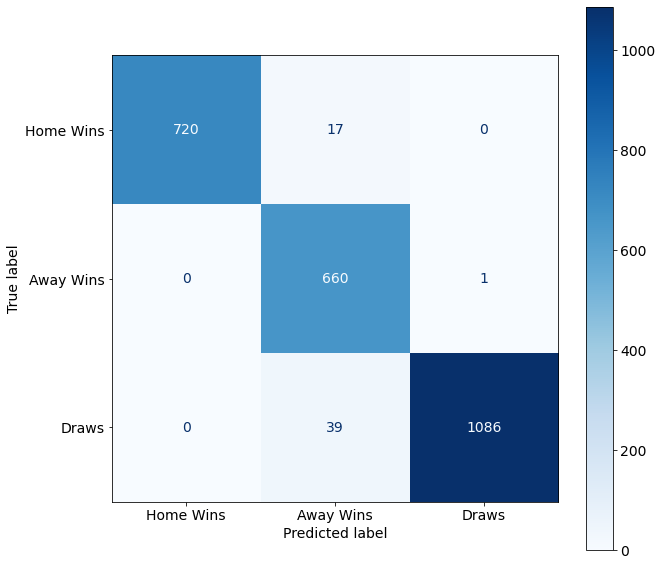

In [56]:
disp = ConfusionMatrixDisplay.from_estimator(
        logreg.fit(X_train, y_train),
        X_test,
        y_test,        
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.2 Decision Tree Model**

######***Training our model***

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.01


######***Making predictions based on our model***

In [58]:
start_time = time.time()
predictions = dt.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.0


######***Evaluating the accuracy of a model***

In [59]:
print('Accuracy of Decision Tree regression classifier on training set:', round(dt.score(X_train, y_train),2))
print('Accuracy score of Decision Tree regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Decision Tree regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Decision Tree regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Decision Tree regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Decision Tree regression classifier on training set: 1.0
Accuracy score of Decision Tree regression classifier on test set: 0.98
Precision score of Decision Tree regression classifier on test set: 0.98
Recall score of Decision Tree regression classifier on test set: 0.98
F1 score of Decision Tree regression classifier on test set: 0.98


######***Confusion matrix of the model***

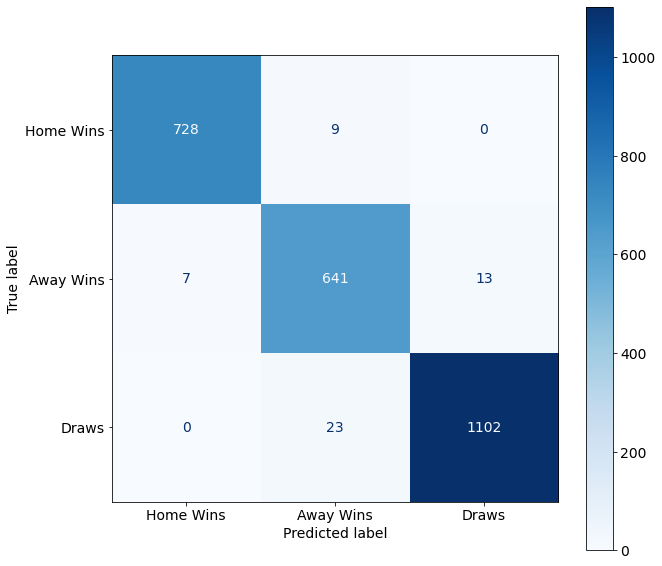

In [60]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.3 Random Forest Model**

######***Training our model***


*   The number of trees in the forest (n_estimators) = 100




In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.55


######***Making predictions based on our model***

In [62]:
start_time = time.time()
predictions = clf.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.05


######***Evaluating the accuracy of a model***

In [63]:
print('Accuracy of Random Forest regression classifier on training set:', round(clf.score(X_train, y_train),2))
print('Accuracy score of Random Forest regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Random Forest regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Random Forest regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Random Forest regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Random Forest regression classifier on training set: 1.0
Accuracy score of Random Forest regression classifier on test set: 0.98
Precision score of Random Forest regression classifier on test set: 0.98
Recall score of Random Forest regression classifier on test set: 0.98
F1 score of Random Forest regression classifier on test set: 0.98


######***Confusion matrix of the model***

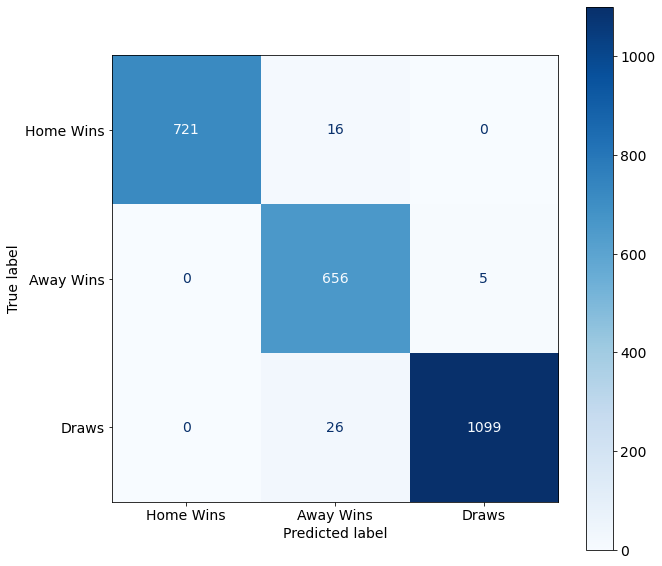

In [64]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.4 Gaussian Naive Bayes (GaussianNB) Model**

######***Training our model***

In [65]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
start_time = time.time()
gaussian = gaussian.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.01


######***Making predictions based on our model***

In [66]:
start_time = time.time()
predictions=gaussian.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.01


######***Evaluating the accuracy of a model***

In [67]:
print('Accuracy of Gaussian Naive Bayes classifier on training set:', round(gaussian.score(X_train, y_train),2))
print('Accuracy score of Gaussian Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Gaussian Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Gaussian Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Gaussian Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.97
Accuracy score of Gaussian Naive Bayes classifier on test set: 0.96
Precision score of Gaussian Naive Bayes classifier on test set: 0.96
Recall score of Gaussian Naive Bayes classifier on test set: 0.97
F1 score of Gaussian Naive Bayes classifier on test set: 0.96


######***Confusion matrix of the model***

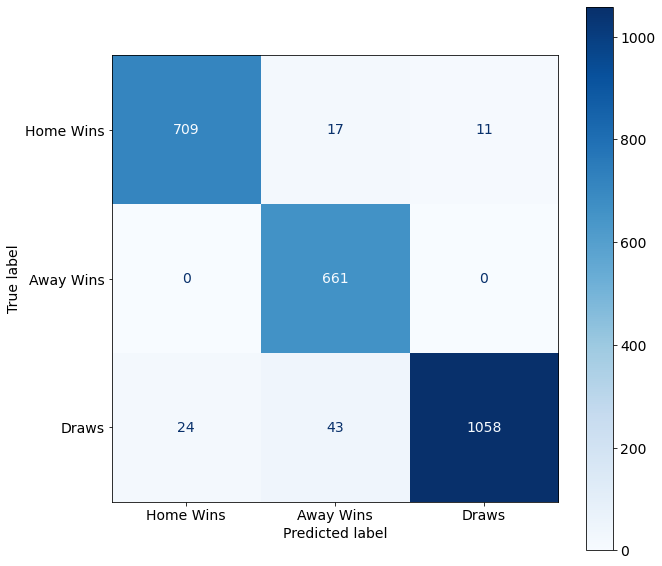

In [68]:
disp = ConfusionMatrixDisplay.from_estimator(
        gaussian.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.5 Multinomial Naive Bayes (MultinomialNB) Model**

######***Training our model***

In [69]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
start_time = time.time()
multi = multi.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.01


######***Making predictions based on our model***

In [70]:
start_time = time.time()
predictions=multi.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.01


######***Evaluating the accuracy of a model***

In [71]:
print('Accuracy of Multinomial Naive Bayes classifier on training set:', round(multi.score(X_train, y_train),2))
print('Accuracy score of Multinomial Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Multinomial Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Multinomial Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Multinomial Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Multinomial Naive Bayes classifier on training set: 0.58
Accuracy score of Multinomial Naive Bayes classifier on test set: 0.57
Precision score of Multinomial Naive Bayes classifier on test set: 0.46
Recall score of Multinomial Naive Bayes classifier on test set: 0.47
F1 score of Multinomial Naive Bayes classifier on test set: 0.41


######***Confusion matrix of the model***

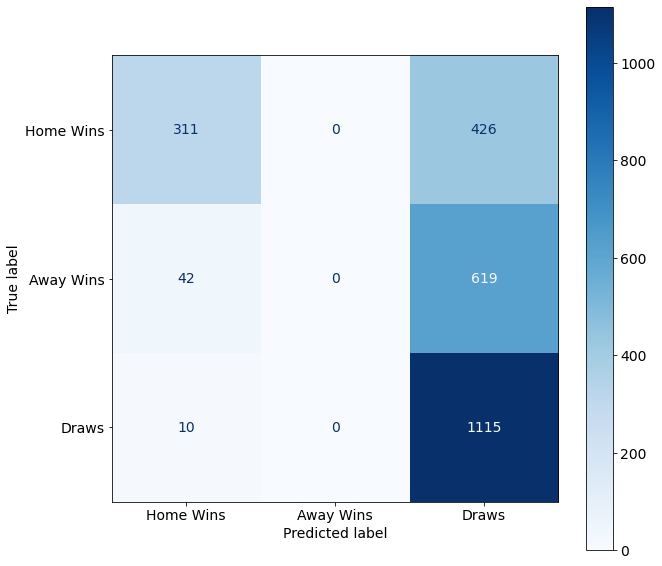

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(
        multi.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.6 Bernoulli Naive Bayes (BernoulliNB) Model**

######***Training our model***

In [73]:
from sklearn.naive_bayes import BernoulliNB
berni = BernoulliNB()
start_time = time.time()
berni = berni.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.01


######***Making predictions based on our model***

In [74]:
start_time = time.time()
predictions=berni.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.0


######***Evaluating the accuracy of a model***

In [75]:
print('Accuracy of Bernoulli Naive Bayes classifier on training set:', round(berni.score(X_train, y_train),2))
print('Accuracy score of Bernoulli Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Bernoulli Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Bernoulli Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Bernoulli Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Bernoulli Naive Bayes classifier on training set: 0.6
Accuracy score of Bernoulli Naive Bayes classifier on test set: 0.59
Precision score of Bernoulli Naive Bayes classifier on test set: 0.5
Recall score of Bernoulli Naive Bayes classifier on test set: 0.51
F1 score of Bernoulli Naive Bayes classifier on test set: 0.45


######***Confusion matrix of the model***

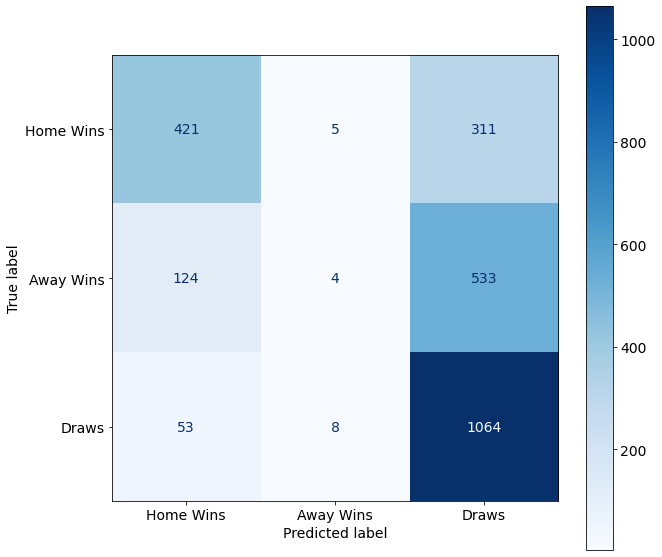

In [76]:
disp = ConfusionMatrixDisplay.from_estimator(
        berni.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.7 K-Nearest Neighbors Model**

######***Training our model***


*   p = 2 , Euclidean Distance
*   n_neighbors = 5, the value of K neighbors
*   metric = 'minkowski'

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.02


######***Making predictions based on our model***

In [78]:
start_time = time.time()
predictions=knn.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.32


######***Evaluating the accuracy of a model***

In [79]:
print('Accuracy of KNN regression classifier on training set:', round(knn.score(X_train, y_train),2))
print('Accuracy score of KNN regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of KNN regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of KNN regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of KNN regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of KNN regression classifier on training set: 0.86
Accuracy score of KNN regression classifier on test set: 0.8
Precision score of KNN regression classifier on test set: 0.78
Recall score of KNN regression classifier on test set: 0.78
F1 score of KNN regression classifier on test set: 0.78


######***Confusion matrix of the model***

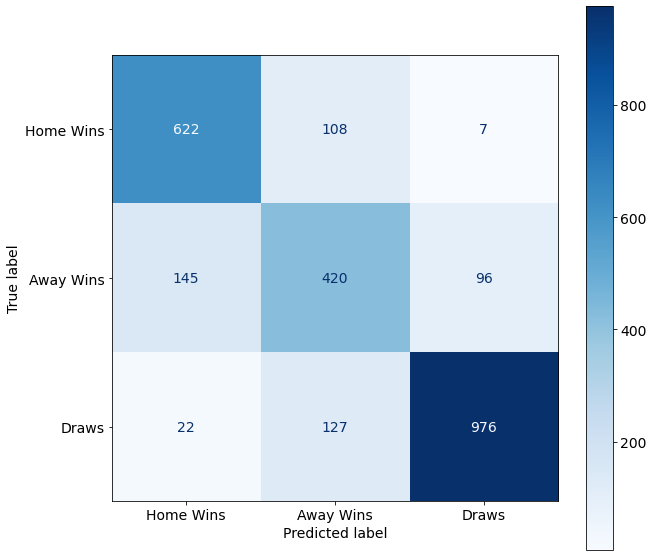

In [80]:
disp = ConfusionMatrixDisplay.from_estimator(
        knn.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**4.8 Support Vector Machine Model**

######***Training our model***

In [81]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') 
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 0.25


######***Making predictions based on our model***

In [82]:
start_time = time.time()
predictions=svm.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.09


######***Evaluating the accuracy of a model***

In [83]:
print('Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set:', round(svm.score(X_train, y_train),2))
print('Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Support Vector Machine with Linear Kernel regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Support Vector Machine with Linear Kernel regression classifier on training set: 0.98
Accuracy score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.98
Precision score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.97
Recall score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.98
F1 score of Support Vector Machine with Linear Kernel regression classifier on test set: 0.98


######***Confusion matrix of the model***

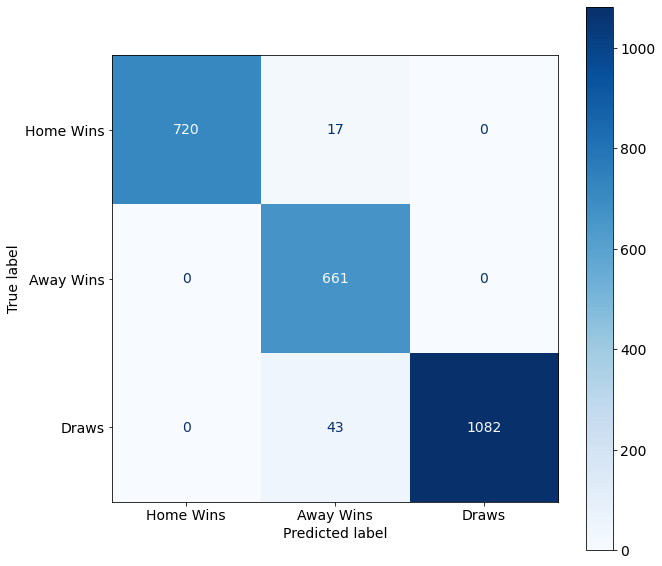

In [84]:
disp = ConfusionMatrixDisplay.from_estimator(
        svm.fit(X_train, y_train),
        X_test,
        y_test,
        display_labels=['Home Wins', 'Away Wins', 'Draws'],
        cmap=plt.cm.Blues
    )
plt.grid(False)
plt.show()

###**Summary:**
Algorithm  | Training Time | Testing Time | Accuracy on Training Set | Accuracy on Test Set | Precision Score | Recall Score | F1 Score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
Logistic Regression | 0.48 | 0.01 | 0.98 | 0.98 | 0.97 | 0.98 | 0.98
Decision Tree | 0.02 | 0.0 | 1.0 | 0.98 | 0.98 | 0.98 | 0.98
Random Forest | 0.59 | 0.05 | 1.0 | 0.98 | 0.98 | 0.98 | 0.98
Gaussian Naive Bayes | 0.01 | 0.0 | 0.97 | 0.96 | 0.96 | 0.97 | 0.96
Multinomial Naive Bayes | 0.01 | 0.0 | 0.58 | 0.57 | 0.46 | 0.47 | 0.41
Bernoulli Naive Bayes | 0.01 | 0.0 | 0.6 | 0.59 | 0.5 | 0.51 | 0.45
k-NN | 0.02 | 0.3 | 0.86 | 0.8 | 0.78 | 0.78 | 0.78
Support Vector Machine | 0.25 | 0.09 | 0.98 | 0.98 | 0.97 | 0.98 | 0.98


***Based on the scores, training time, testing time and confusion matrix, let us consider Decision Tree Model for fine tuning***

##**5. Fine Tuning**

######***Using Entropy Criterion***

In [85]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

######***Evaluating the Model***

In [86]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

In [87]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.9882415114281939
Test Accuracy : 0.9782005548949663


######***Using GridSearchCV***

In [88]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [89]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010129,0.000502,0.003440,0.000471,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.982567,0.985201,0.980444,0.982558,0.982693,0.001687,13
1,0.012996,0.002784,0.003486,0.000190,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.982567,0.985201,0.980444,0.982558,0.982693,0.001687,13
2,0.011088,0.001636,0.003354,0.000193,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.982567,0.985201,0.980444,0.982558,0.982693,0.001687,13
3,0.012670,0.002493,0.003381,0.000210,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.982567,0.985201,0.980444,0.982558,0.982693,0.001687,13
4,0.010033,0.000229,0.003216,0.000182,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.982567,0.985201,0.980444,0.982558,0.982693,0.001687,13


In [90]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
17,0.013975,0.000941,0.003350,0.000333,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.983096,0.987844,0.985729,0.982558,0.984807,0.002125,1
22,0.017218,0.004327,0.003228,0.000260,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.983096,0.987844,0.985729,0.982558,0.984807,0.002125,1
42,0.018404,0.002965,0.004935,0.002810,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.983096,0.987844,0.985729,0.982558,0.984807,0.002125,1
47,0.014957,0.001734,0.004385,0.001462,entropy,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.983096,0.987844,0.985729,0.982558,0.984807,0.002125,1
41,0.014417,0.000451,0.003382,0.000087,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.982567,0.987844,0.984144,0.981501,0.984014,0.002403,5


In [91]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42)

In [92]:
dt_best = grid_search.best_estimator_

######***Evaluating the Model with Best Estimator Parameters***

In [93]:
evaluate_model(dt_best)

Train Accuracy : 0.9881093935790726
Test Accuracy : 0.9789932619896948


######***Classification Report***

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       737
           1       0.94      0.98      0.96       661
           2       0.99      0.98      0.98      1125

    accuracy                           0.98      2523
   macro avg       0.98      0.98      0.98      2523
weighted avg       0.98      0.98      0.98      2523



######_You have reached the end of File!!_